# 음주 여부에 따라 건강검진 수치 차이가 있을까?
# 신장과 허리 둘레의 크기는 체중과 상관관계가 있을까?
- 분석을 통해 가설을 검증해보기

# 라이브러리 로드

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 한글 폰트 설정

In [3]:
import os
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")  
plt.rc("axes", unicode_minus = False)
%config InlineBackend.figure_format = 'retina'

# 데이터 불러오기

In [4]:
df = pd.read_csv('../data/NHIS_OPEN_GJ_2017.csv', encoding='cp949')
print(df.shape)

(1000000, 34)


## 데이터 미리보기

In [5]:
df.head()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  시력(좌)  \
0  2017        1     1            8    43        170         75  90.0    1.0   
1  2017        2     1            7    11        180         80  89.0    0.9   
2  2017        3     1            9    41        165         75  91.0    1.2   
3  2017        4     1           11    48        175         80  91.0    1.5   
4  2017        5     1           11    30        165         60  80.0    1.0   

   시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  치아마모증유무  \
0    1.0  ...   40.0   1.0   1.0         1      NaN    NaN      NaN   
1    1.2  ...   27.0   3.0   0.0         1      NaN    NaN      NaN   
2    1.5  ...   68.0   1.0   0.0         0      NaN    NaN      NaN   
3    1.2  ...   18.0   1.0   0.0         1      NaN    NaN      NaN   
4    1.2  ...   25.0   1.0   0.0         1      NaN    NaN      NaN   

   제3대구치(사랑니)이상   치석   데이터공개일자  
0           NaN  1.0  20181126  
1           NaN  2.0  20181126  
2           NaN  NaN  20181126  
3           NaN  0.0  20181126  
4           NaN  0.0  20181126  

[5 rows x 34 columns]

In [6]:
df.tail()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
999995  2017   999996     1           10    48        175         80  92.1   
999996  2017   999997     1            8    41        170         75  86.0   
999997  2017   999998     2            9    26        155         50  68.0   
999998  2017   999999     1            6    29        175         60  72.0   
999999  2017  1000000     1           11    41        160         70  90.5   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
999995    1.5    1.5  ...   27.0   1.0   0.0         0      NaN    NaN   
999996    1.0    1.5  ...   15.0   1.0   0.0         0      NaN    NaN   
999997    1.0    0.7  ...   17.0   3.0   1.0         0      NaN    NaN   
999998    1.5    1.0  ...   17.0   1.0   0.0         0      NaN    NaN   
999999    1.0    1.5  ...   36.0   3.0   1.0         0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상  치석   데이터공개일자  
999995      NaN           NaN NaN  20181126  
999996      NaN           NaN NaN  20181126  
999997      NaN           NaN NaN  20181126  
999998      NaN           NaN NaN  20181126  
999999      NaN           NaN NaN  20181126  

[5 rows x 34 columns]

In [136]:
# get random value
df_sample = df.sample(10000)
df_sample

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
449006  2017   449007     1            9    26        170         60  79.0   
884117  2017   884118     1           10    41        175         80  85.2   
181675  2017   181676     1           15    48        155         50  80.0   
189198  2017   189199     2           15    45        145         60  89.0   
417680  2017   417681     2           14    30        145         45  72.0   
...      ...      ...   ...          ...   ...        ...        ...   ...   
749079  2017   749080     1           17    41        160         60  84.0   
585152  2017   585153     2            8    47        160         65  83.0   
759851  2017   759852     1           10    41        165         60  72.0   
585328  2017   585329     1            6    41        175         60  75.0   
303149  2017   303150     2           14    11        155         40  66.3   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
449006    1.0    1.0  ...   14.0   1.0   1.0         0      NaN    NaN   
884117    1.2    1.2  ...   79.0   3.0   1.0         1      NaN    NaN   
181675    1.0    1.2  ...   44.0   1.0   0.0         0      NaN    NaN   
189198    0.8    0.6  ...   50.0   1.0   0.0         1      NaN    NaN   
417680    0.9    0.9  ...   20.0   1.0   0.0         0      NaN    NaN   
...       ...    ...  ...    ...   ...   ...       ...      ...    ...   
749079    0.5    9.9  ...   16.0   2.0   0.0         1      NaN    NaN   
585152    0.9    0.9  ...   13.0   1.0   1.0         1      NaN    NaN   
759851    0.9    0.9  ...   42.0   3.0   0.0         1      NaN    NaN   
585328    2.0    1.5  ...   22.0   3.0   1.0         1      NaN    NaN   
303149    0.4    0.6  ...   11.0   1.0   0.0         1      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
449006      NaN           NaN  NaN  20181126  
884117      NaN           NaN  0.0  20181126  
181675      NaN           NaN  NaN  20181126  
189198      NaN           NaN  0.0  20181126  
417680      NaN           NaN  NaN  20181126  
...         ...           ...  ...       ...  
749079      NaN           NaN  1.0  20181126  
585152      NaN           NaN  1.0  20181126  
759851      NaN           NaN  0.0  20181126  
585328      NaN           NaN  1.0  20181126  
303149      NaN           NaN  0.0  20181126  

[10000 rows x 34 columns]

# 기본 정보 보기

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [9]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [10]:
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진수검여부          int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

# 결측치 보기

In [11]:
# isnull로 null 이면 True(1), null이 아니면 False(0)
# 위 값을 sum()으로 더한다.
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               599477
데이터공개일자               0
dtype: int64

In [12]:
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               599477
데이터공개일자               0
dtype: int64

<AxesSubplot:>

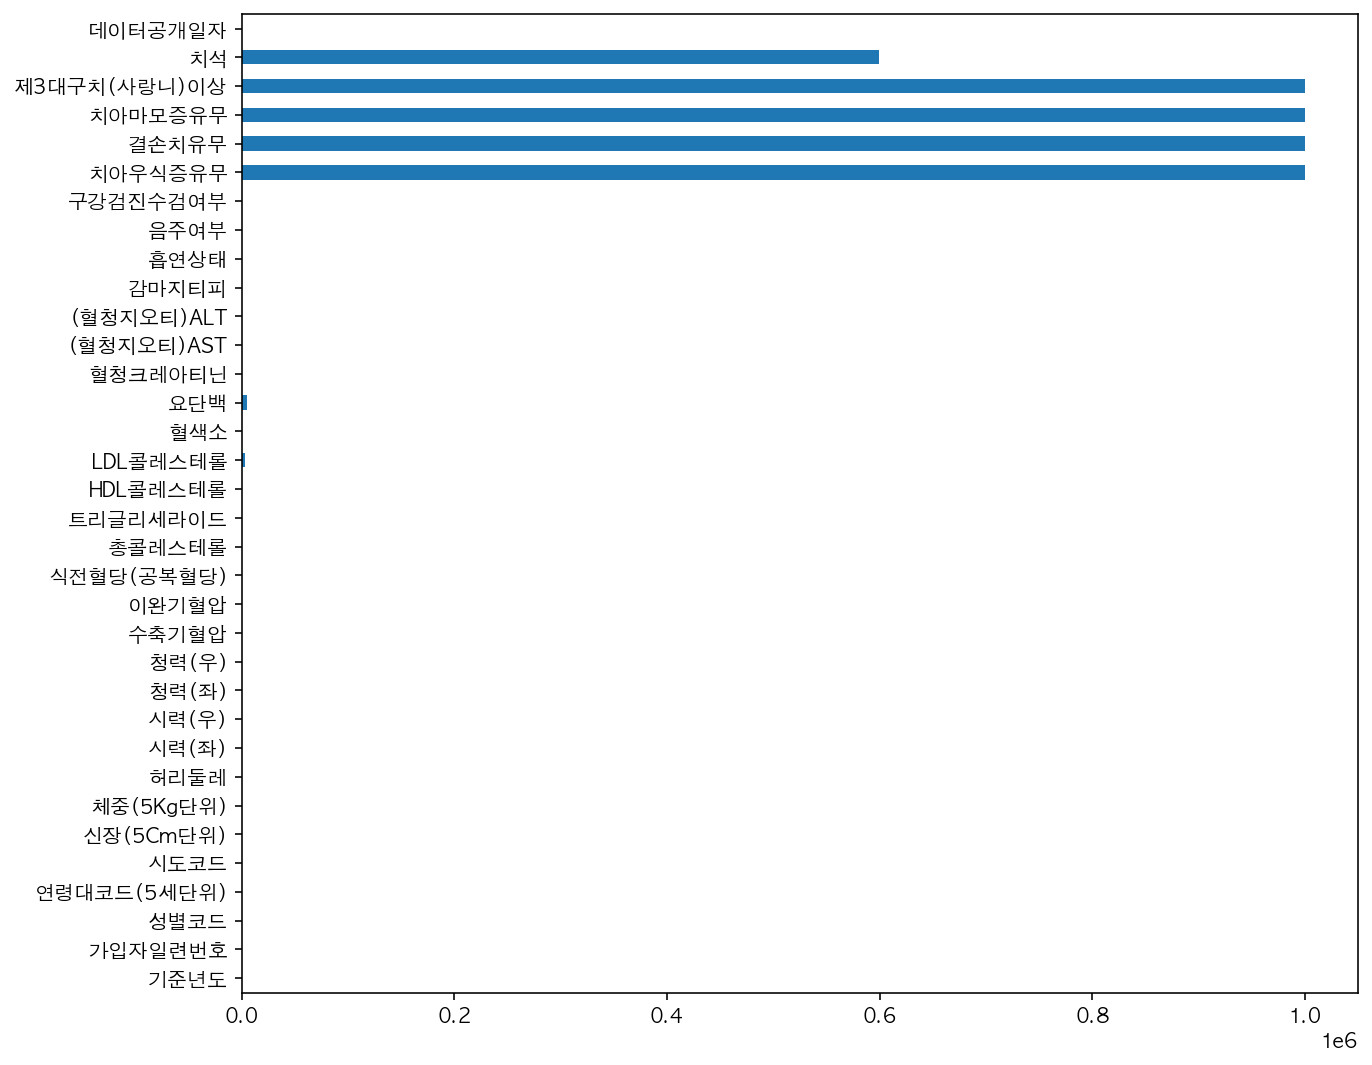

In [13]:
df.isnull().sum().plot.barh(figsize=(10,9))

# 일부 데이터 요약하기

In [14]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [15]:
# 두 개 이상의 컬럼을 가져오려면 []로 감싸줘서 리스트 형태를 만들어야한다.
df[['(혈청지오티)ALT', '(혈청지오티)AST']].head()

(혈청지오티)ALT  (혈청지오티)AST
0        35.0        21.0
1        36.0        20.0
2        32.0        47.0
3        34.0        29.0
4        12.0        19.0

In [16]:
df[['(혈청지오티)ALT', '(혈청지오티)AST']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)ALT  999958 non-null  float64
 1   (혈청지오티)AST  999959 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [17]:
df[['(혈청지오티)ALT', '(혈청지오티)AST']].describe()

(혈청지오티)ALT     (혈청지오티)AST
count  999958.000000  999959.000000
mean       25.749509      25.994671
std        26.294770      23.587469
min         1.000000       1.000000
25%        15.000000      19.000000
50%        20.000000      23.000000
75%        29.000000      28.000000
max      7210.000000    9999.000000

# value_counts로 값 집계하기

In [18]:
# 남자: 1, 여자: 2
df['성별코드'].value_counts()

1    530410
2    469590
Name: 성별코드, dtype: int64

In [19]:
df['흡연상태'].value_counts()

1.0    607942
3.0    215702
2.0    176212
Name: 흡연상태, dtype: int64

# groupby 와 pivot_table 사용하기
## groupby

In [20]:
df.groupby(["성별코드"])['가입자일련번호'].count()
# Series 형태로 결과가 나온다.
# pivot_table 은 DF 형태로 나온다.

성별코드
1    530410
2    469590
Name: 가입자일련번호, dtype: int64

In [24]:
df.groupby(['성별코드', '음주여부'])['가입자일련번호'].count()

성별코드  음주여부
1     0.0     173612
      1.0     356587
2     0.0     326827
      1.0     142438
Name: 가입자일련번호, dtype: int64

In [26]:
# 음주 여부에 따라 간에 관련된 수치의 평균이 영향이 받는 것을 분석
df.groupby(['성별코드', '음주여부'])['감마지티피'].mean()

성별코드  음주여부
1     0.0     34.739868
      1.0     56.610981
2     0.0     22.612408
      1.0     25.001018
Name: 감마지티피, dtype: float64

In [27]:
df.groupby(['성별코드', '음주여부'])['감마지티피'].describe()
# max 값이 2, 3사분위 수보다 지나치게 높다.
# 다른 의미가 있음을 암시 Or 쓰레기 값

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   173604.0  34.739868  37.606197  1.0  18.0  25.0  38.0  999.0
     1.0   356576.0  56.610981  68.851128  1.0  24.0  37.0  63.0  999.0
2    0.0   326813.0  22.612408  25.203579  1.0  13.0  17.0  24.0  999.0
     1.0   142429.0  25.001018  36.725100  1.0  13.0  17.0  25.0  999.0

In [29]:
df.groupby(['성별코드', '음주여부'])['감마지티피'].agg(['count', 'mean', 'median'])

count       mean  median
성별코드 음주여부                           
1    0.0   173604  34.739868    25.0
     1.0   356576  56.610981    37.0
2    0.0   326813  22.612408    17.0
     1.0   142429  25.001018    17.0

## pivot_table

In [31]:
# 사용법이 groupby에 비해 직관적이고 효과적이다. 속도는 상대적으로 느리다.
df.pivot_table(index='음주여부', values="가입자일련번호", aggfunc='count')

가입자일련번호
음주여부         
0.0    500439
1.0    499025

In [36]:
pd.pivot_table(df, index='음주여부', values='감마지티피', 
               aggfunc=['mean', 'median'])

mean median
          감마지티피  감마지티피
음주여부                  
0.0   26.819650   19.0
1.0   47.588675   30.0

In [38]:
pd.pivot_table(df, index=['성별코드', '음주여부'], values='감마지티피', 
               aggfunc='describe')

25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                              
1    0.0   18.0  25.0  38.0  173604.0  999.0  34.739868  1.0  37.606197
     1.0   24.0  37.0  63.0  356576.0  999.0  56.610981  1.0  68.851128
2    0.0   13.0  17.0  24.0  326813.0  999.0  22.612408  1.0  25.203579
     1.0   13.0  17.0  25.0  142429.0  999.0  25.001018  1.0  36.725100

# 전체 데이터 시각화
- 100만개 이상의 데이터를 시각화할 때는 되도록 groupby or pivot_table로 연산을 하고 시각화를 하는 것을 권장.
- 100만개 이상의 데이터를 seaborn과 같은 고급 통계 연산을 하는 그래프를 사용하게 되면 많이 느리다.

## 히스토그램

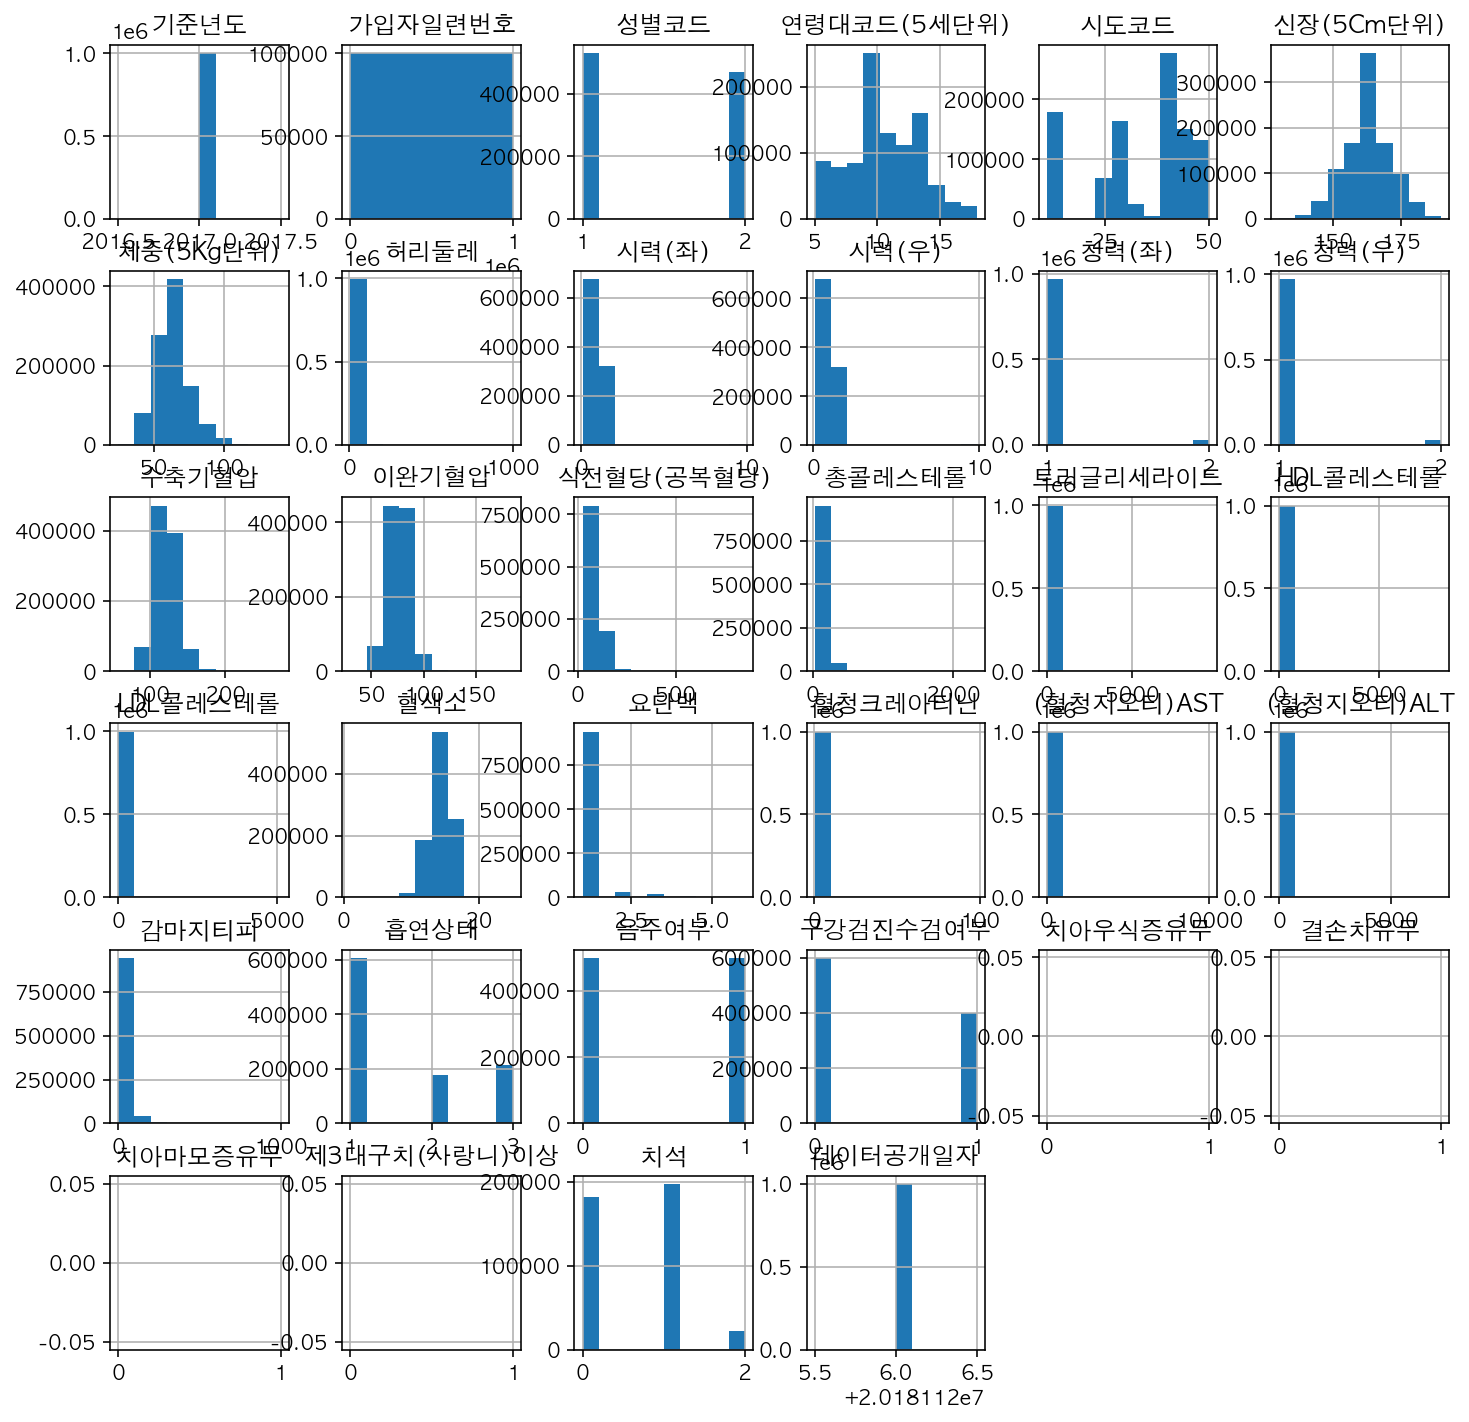

In [41]:
h = df.hist(figsize=(12,12))

## 슬라이싱을 사용해 히스토그램 그리기

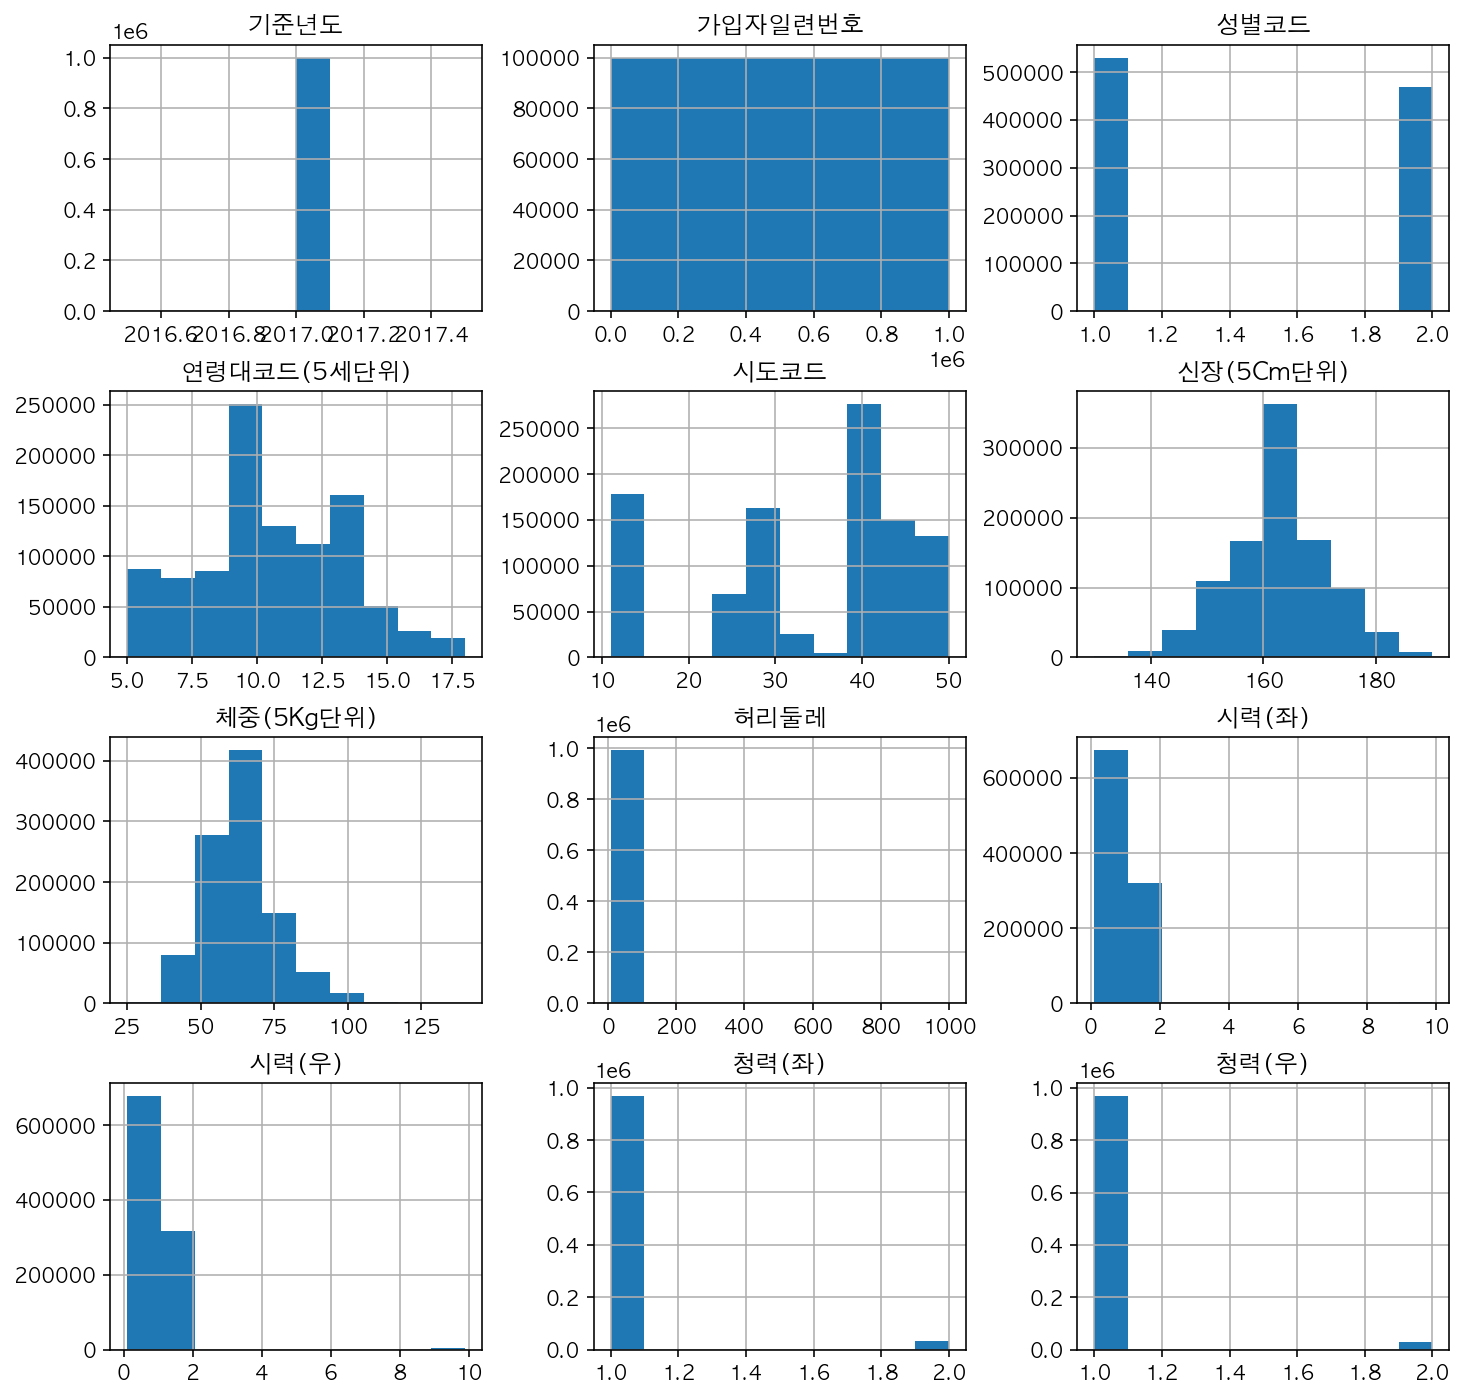

In [42]:
# 11 컬럼까지만 그리기
h = df.iloc[:, :12].hist(figsize=(12,12))

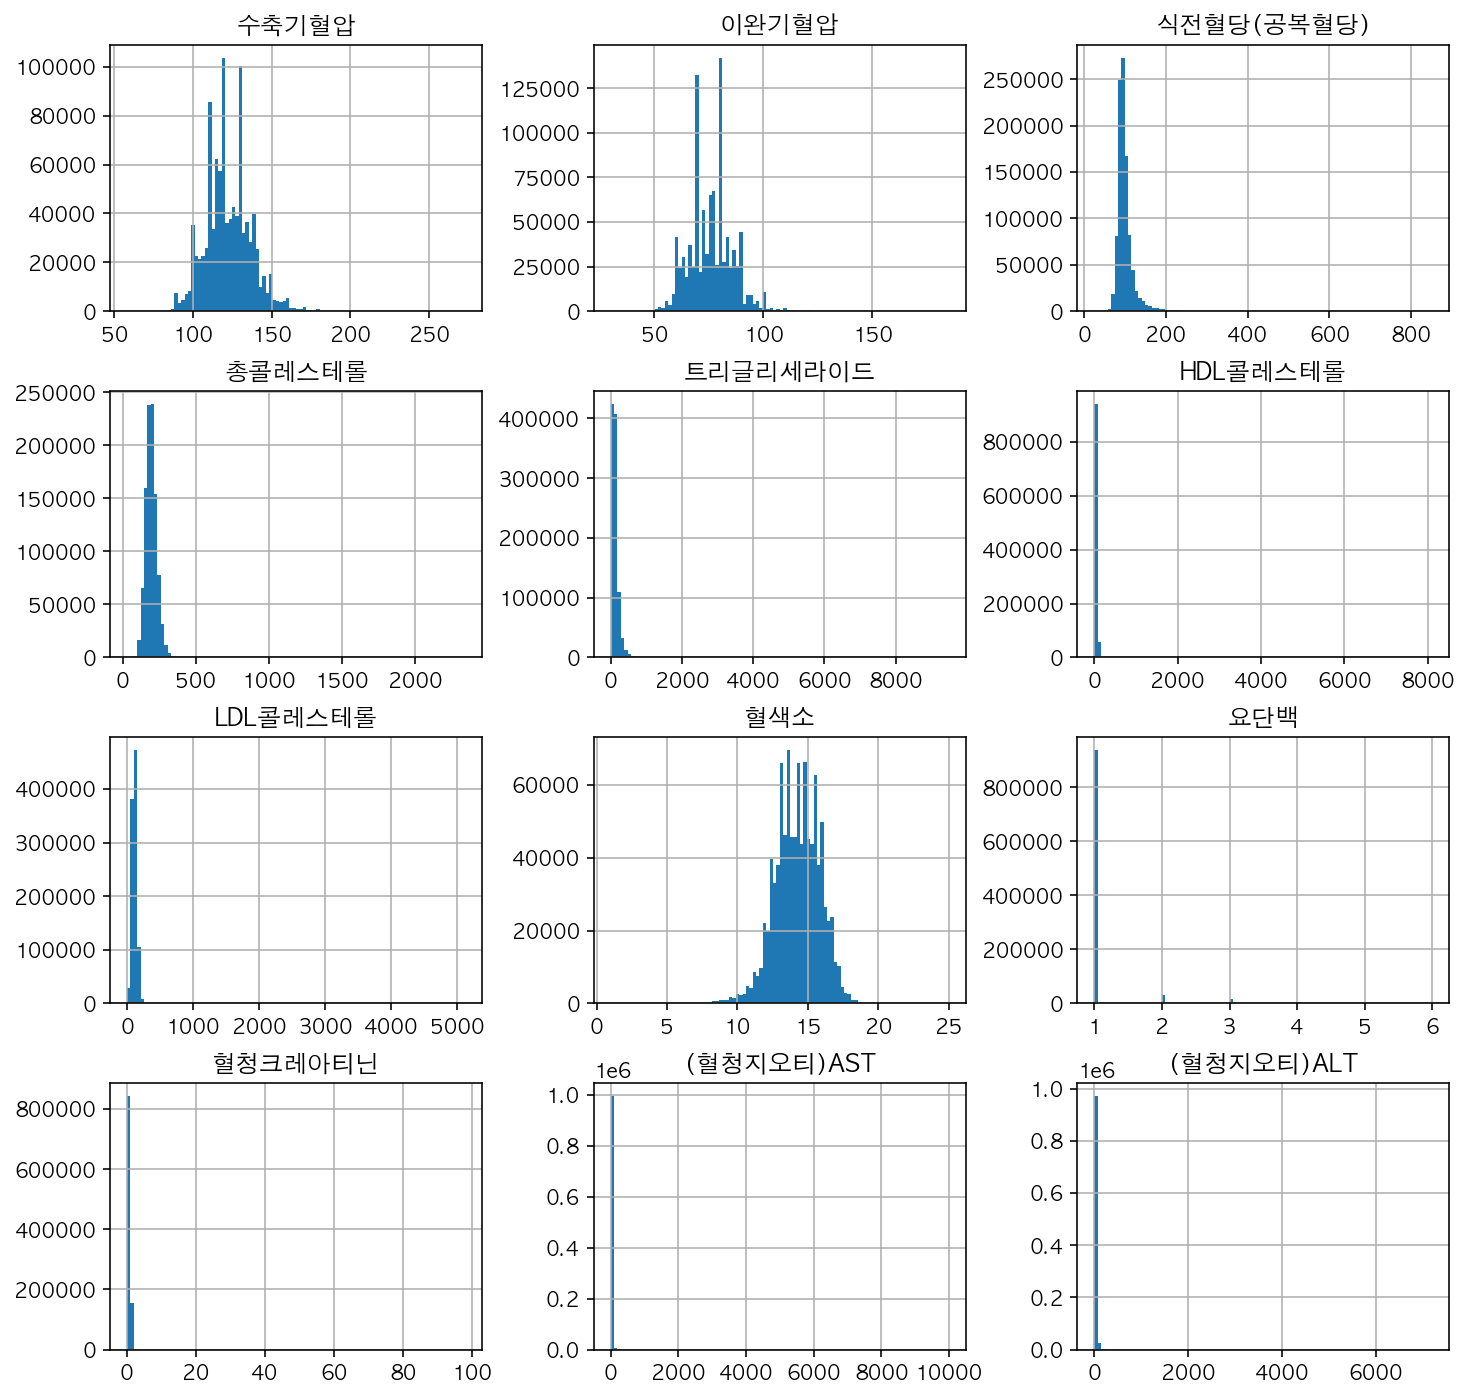

In [45]:
# 12 ~ 23까지 (12:24)
h = df.iloc[:, 12:24].hist(figsize=(12, 12), bins=100)

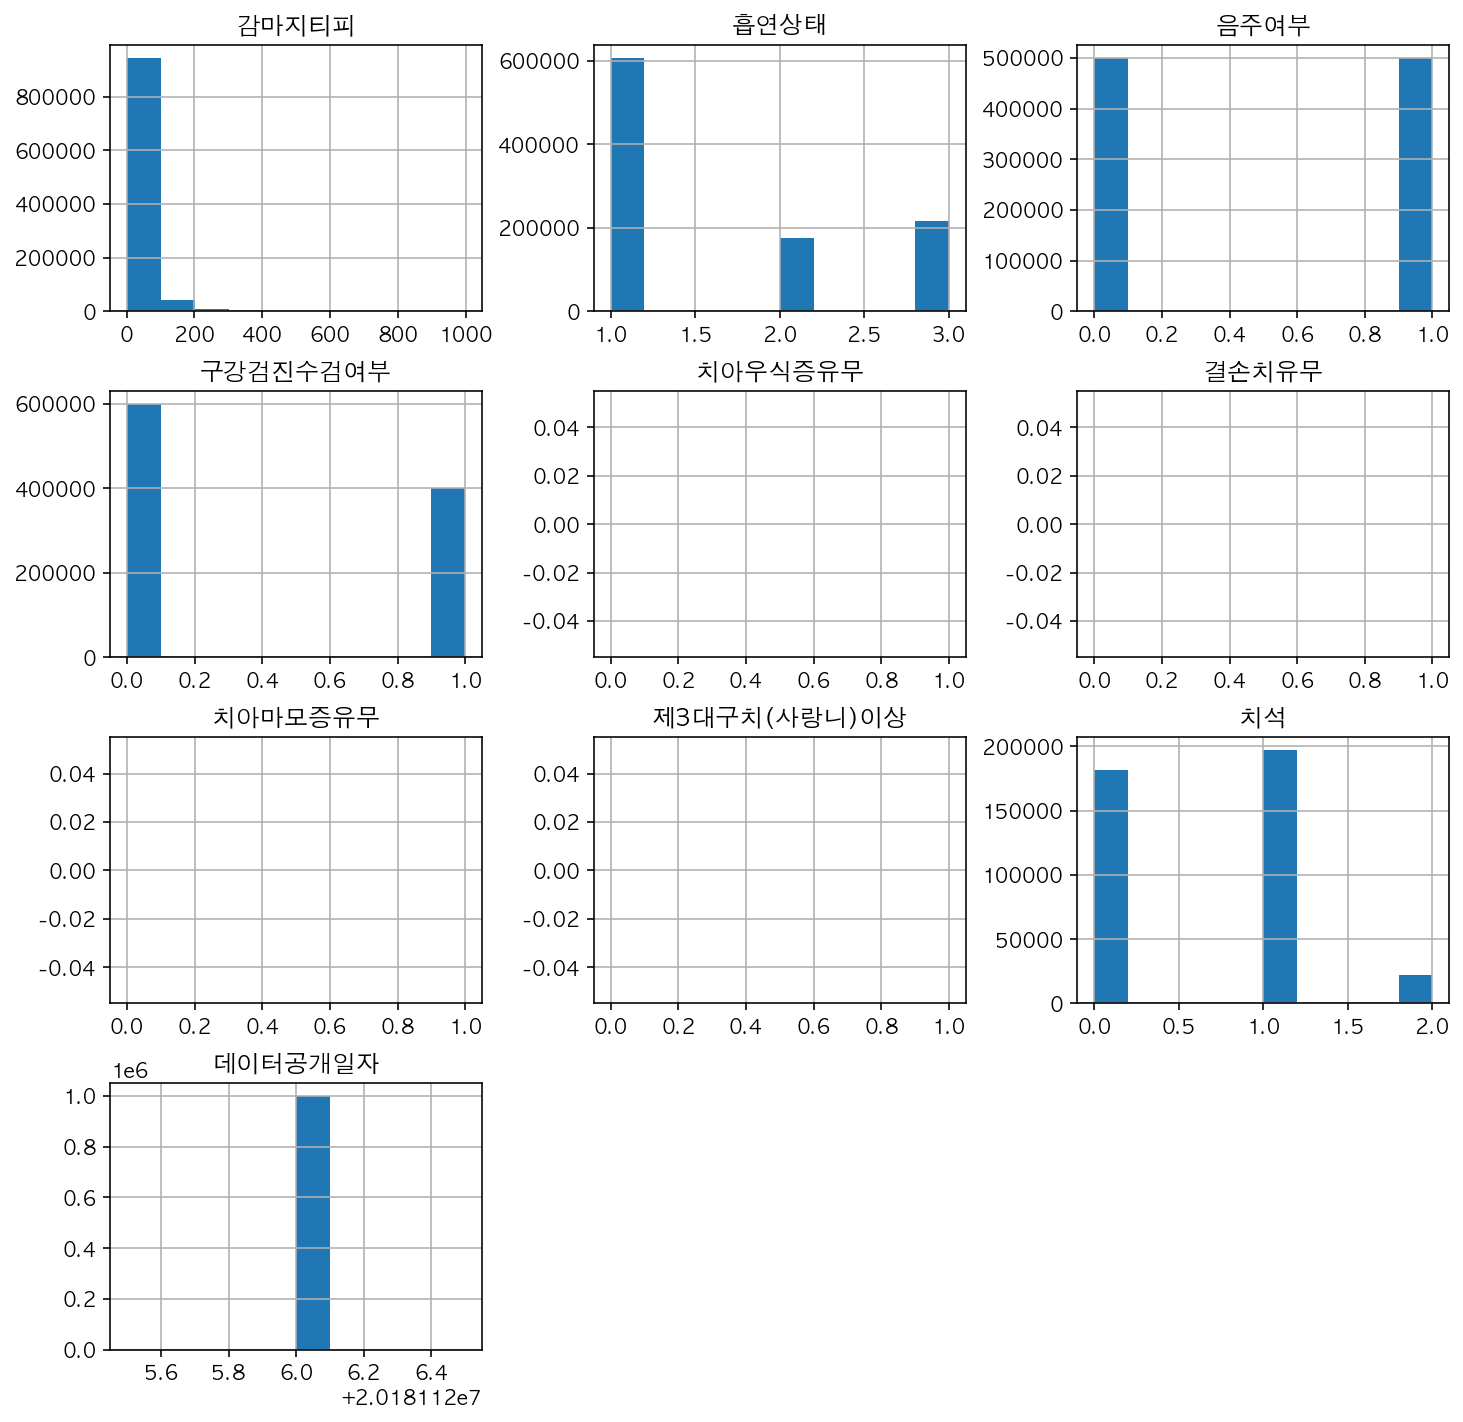

In [47]:
# 24 ~ 끝까지 (24:)
h = df.iloc[:, 24:].hist(figsize=(12, 12), bins=10)

# 샘플 데이터 추출하기

In [50]:
# df.sample을 통해 일부 데이터만 샘플 데이터를 추출합니다.
# random_state를 사용해 샘플링되는 값을 고정할 수 있습니다.
# 실험을 통제하기 위해 random_state는 고정하기도 합니다.
# 여기에서는 1을 사용하겠습니다. 이 값은 높든 낮든 상관 없이 값을 고정하는 역할만 합니다.

df_sample = df.sample(1000, random_state=1)
df_sample.shape

(1000, 34)

# 데이터 시각화 도구 seaborn 사용하기
- matplotlib을 사용하기 쉽게 만들어 졌으며, 간단하게 고급 통계 연산을 할 수 있습니다.

# 범주형(카테고리) 데이터 시각화
- countplot은 범주형 데이터의 수를 더한 값을 그래프로 표현한다.
- value_counts로 구한 값을 시각화 한다고 보면 된다.

## countplot - 음주여부

<AxesSubplot:>

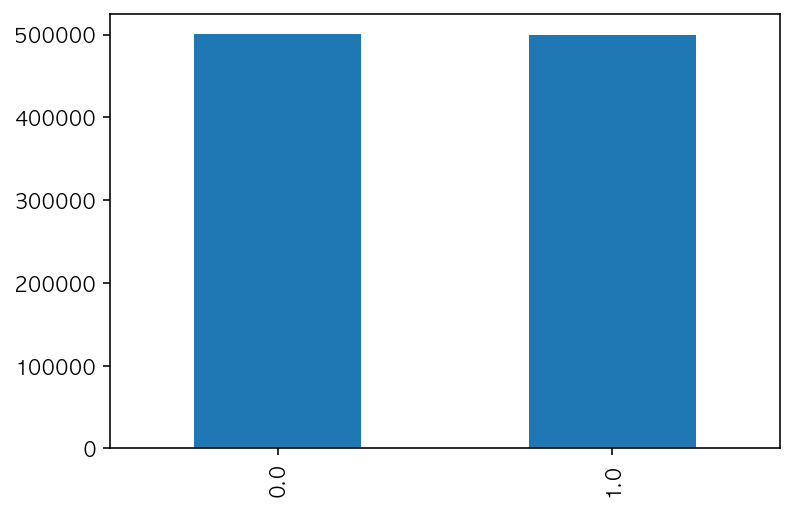

In [55]:
# 음주 여부에 따른 countplot 그리기.
df['음주여부'].value_counts().plot.bar()

<AxesSubplot:xlabel='음주여부', ylabel='count'>

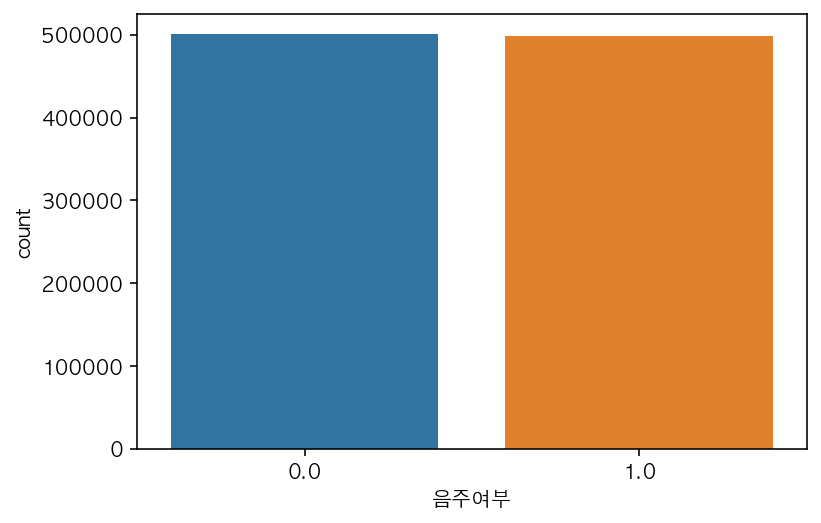

In [58]:
sns.countplot(x='음주여부', data=df)

## Hue 옵션 사용하기

<AxesSubplot:xlabel='음주여부', ylabel='count'>

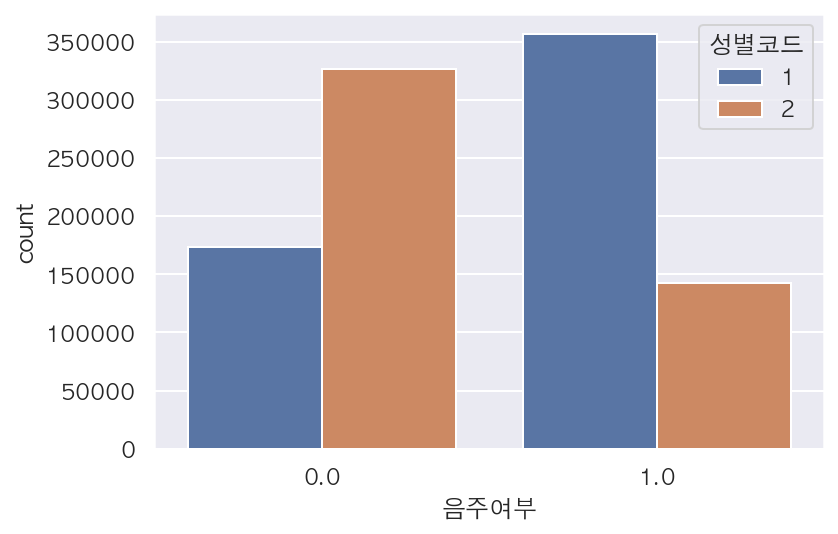

In [63]:
sns.set(font_scale=1, font='AppleGothic')
sns.countplot(data=df, x='음주여부', hue="성별코드")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='count'>

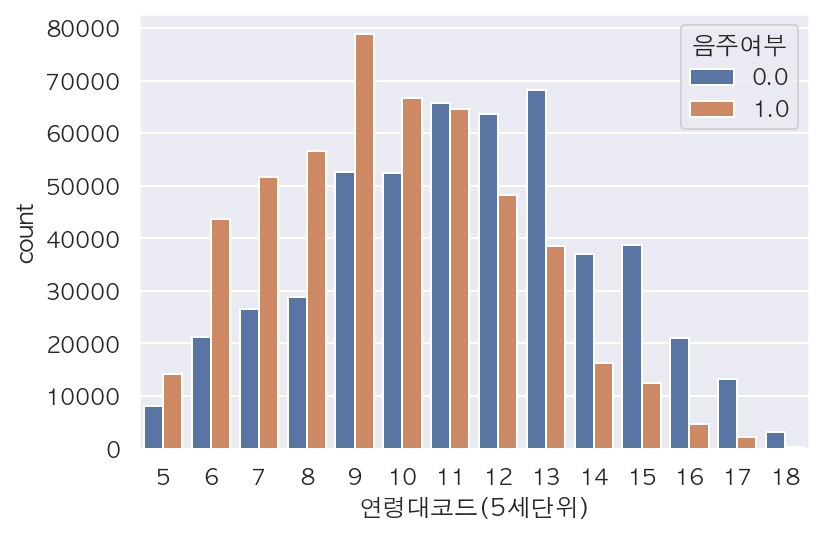

In [64]:
# 연령대별 음주여부
sns.countplot(data=df, x='연령대코드(5세단위)', hue='음주여부')

## countplot - 키와 몸무게
- 키와 몸무게는 연속형 데이터라고 볼 수 있습니다.
- 하지만 이 데이터는 키는 5cm, 체중은 5kg 단위로 되어 있습니다.
- 이렇게 특정 범위로 묶게 되면 연속형 데이터라기 보다는 범주형 데이터라고 볼 수 있습니다.

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

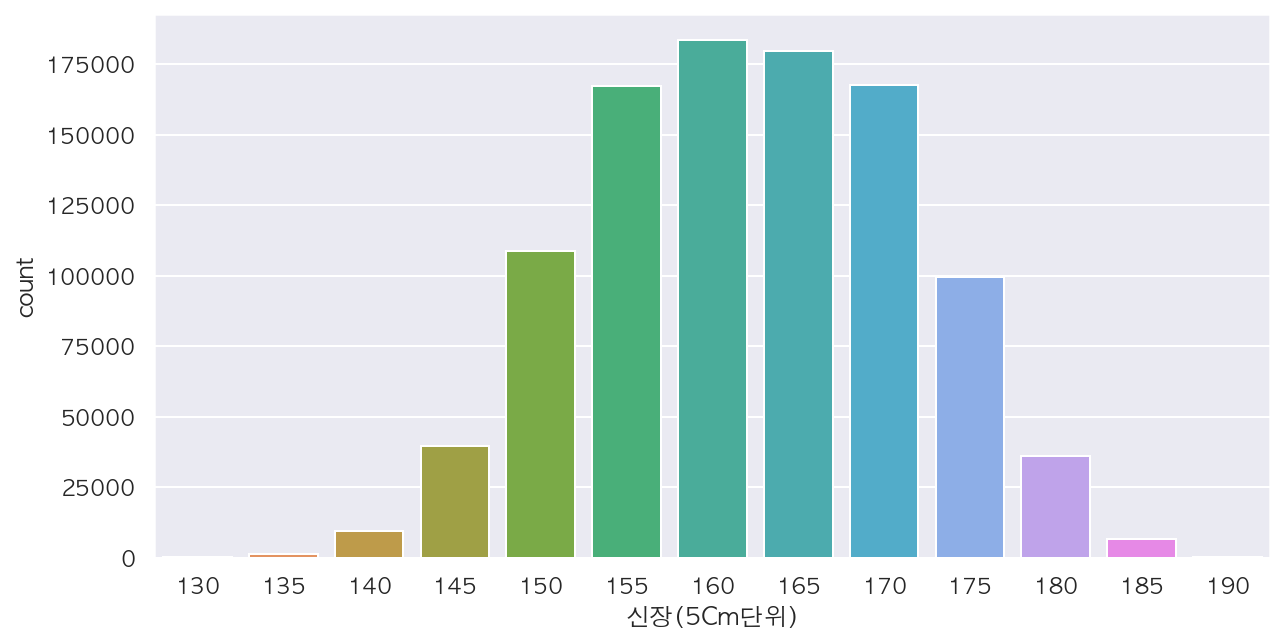

In [68]:
# countplot 으로 키를 봅니다.
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='신장(5Cm단위)')

<AxesSubplot:xlabel='체중(5Kg단위)', ylabel='count'>

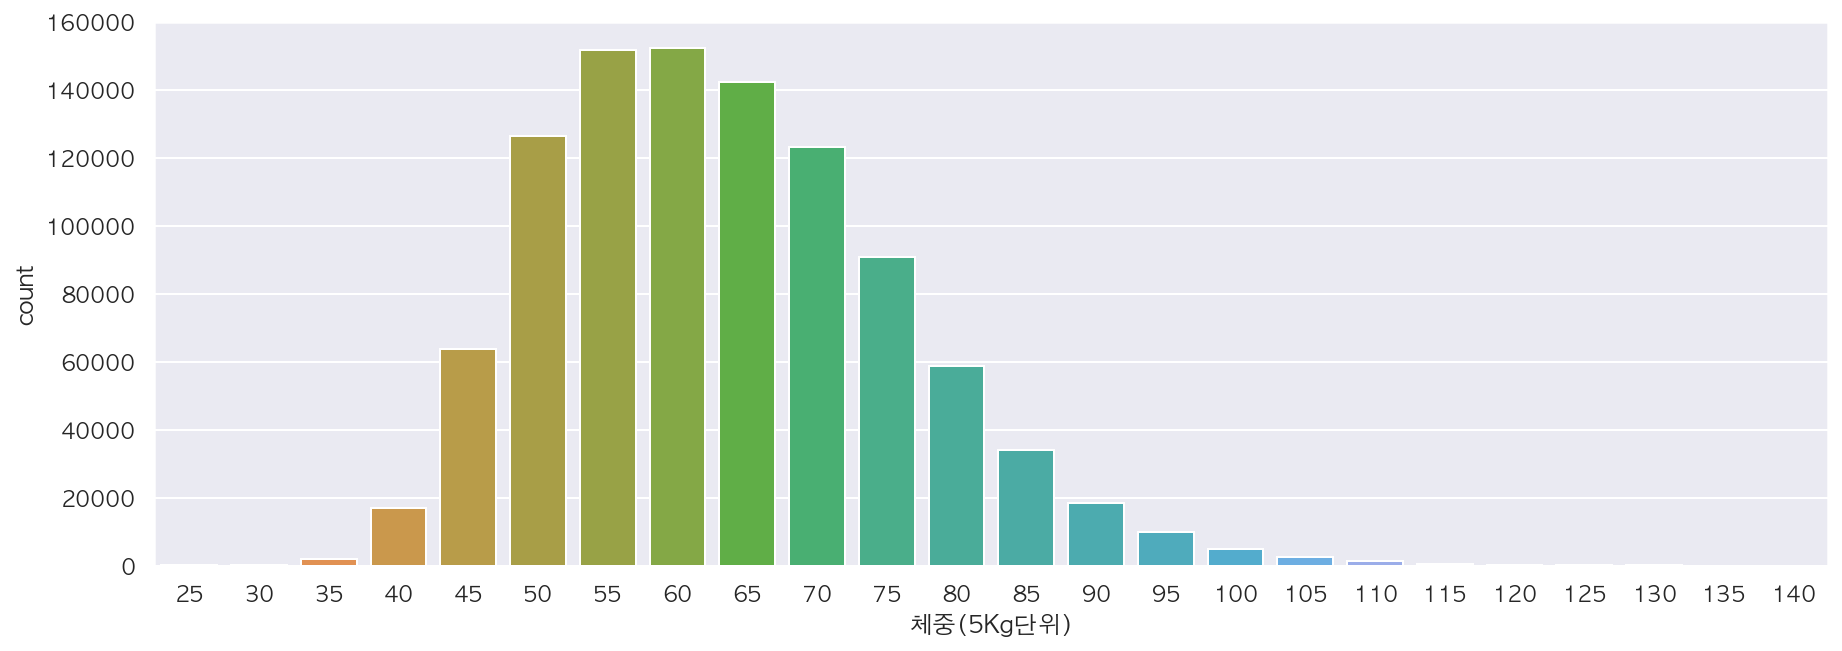

In [73]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='체중(5Kg단위)')

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

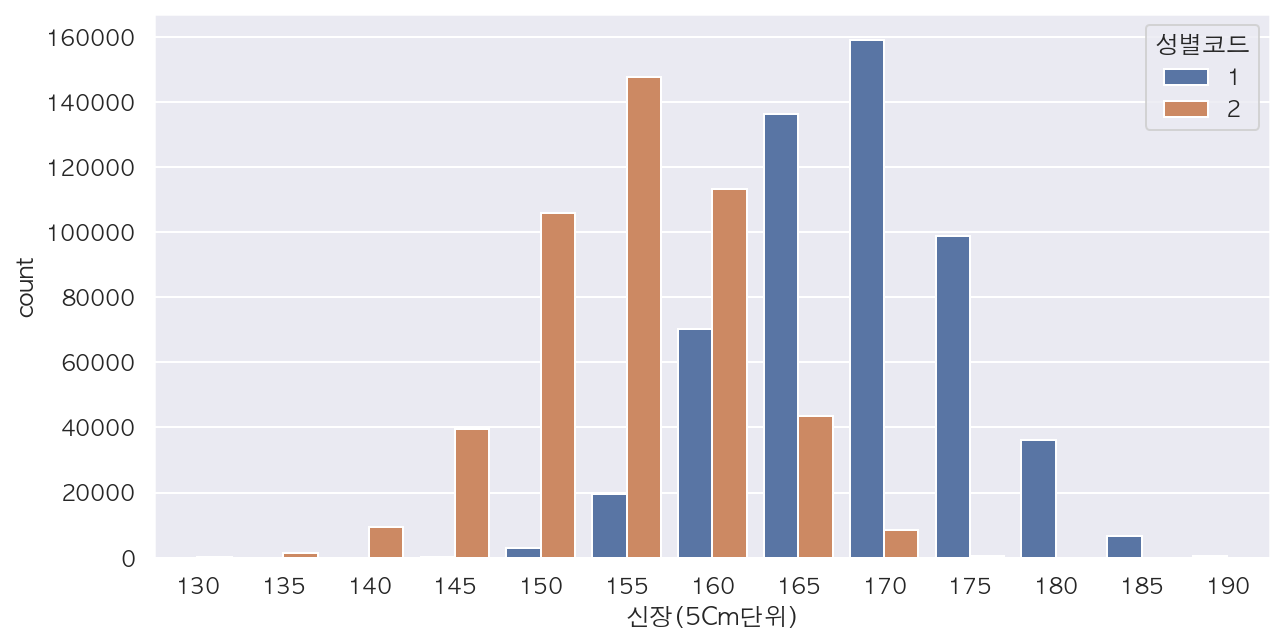

In [74]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='신장(5Cm단위)', hue='성별코드')

<AxesSubplot:xlabel='체중(5Kg단위)', ylabel='count'>

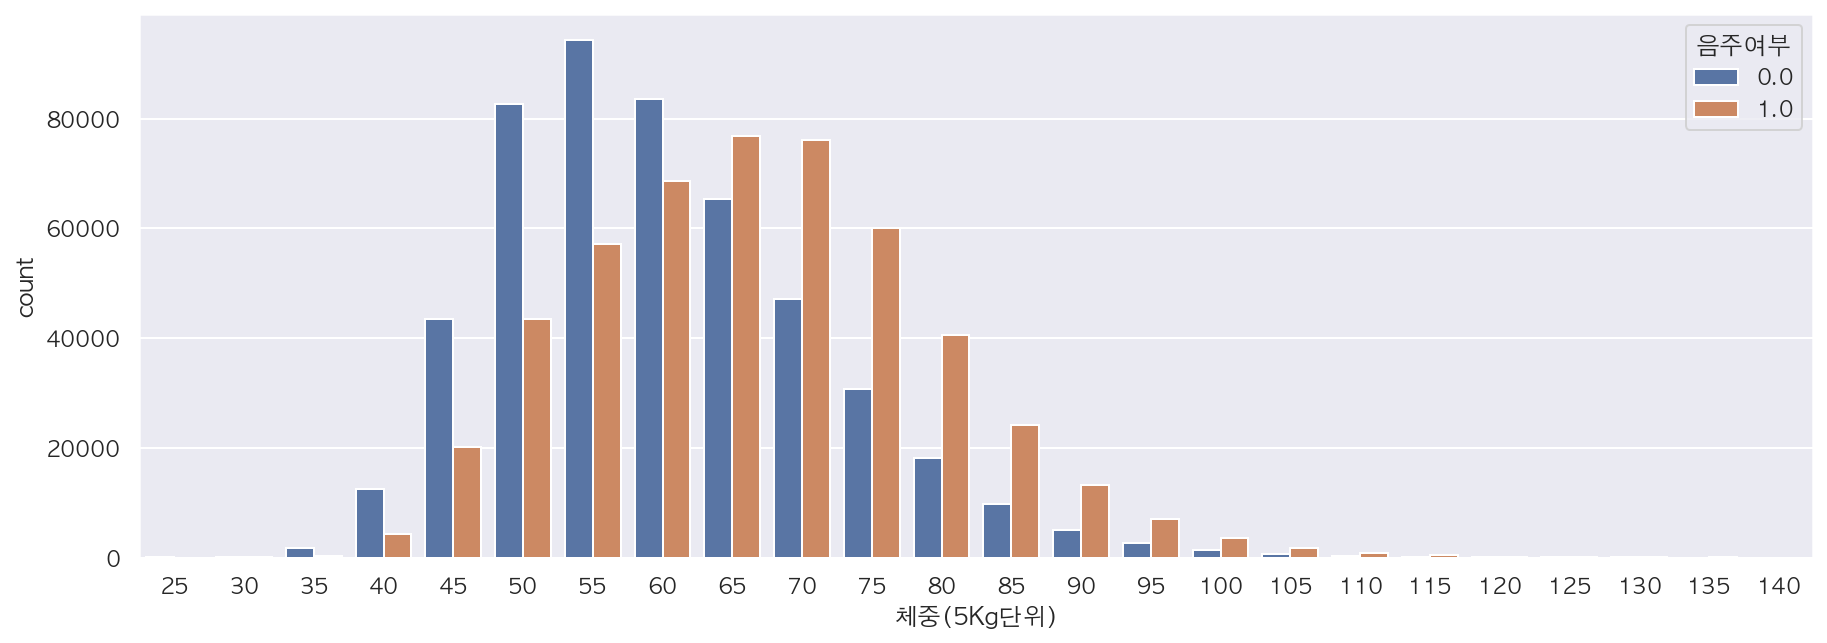

In [76]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='체중(5Kg단위)', hue='음주여부')
# 음주를 하는 사람이 체중이 대체로 높은 것을 시각적으로 확인할 수 있다.

## barplot - 수치형 vs 범주형 데이터 시각화

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

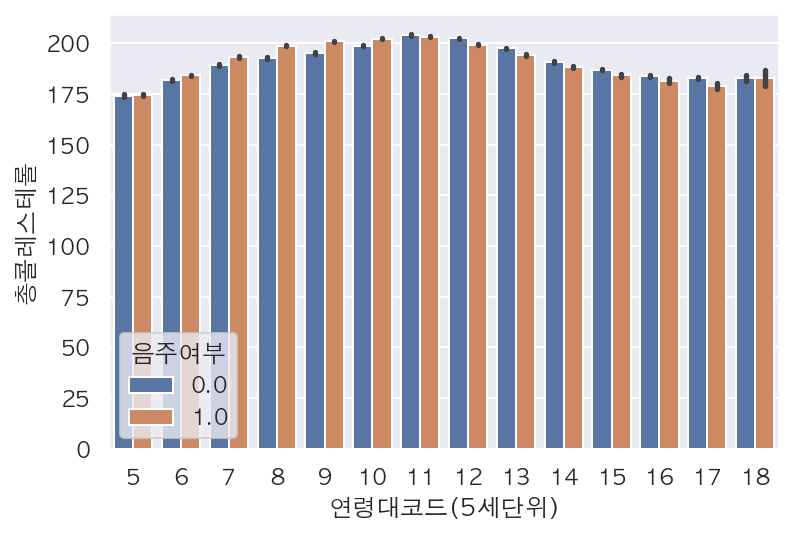

In [78]:
# 연령대코드와 총 콜레스테롤을 봅니다.
sns.barplot(data=df, x='연령대코드(5세단위)', y='총콜레스테롤', hue='음주여부') # 총 콜레스테롤의 평균값을 표현해준다.

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

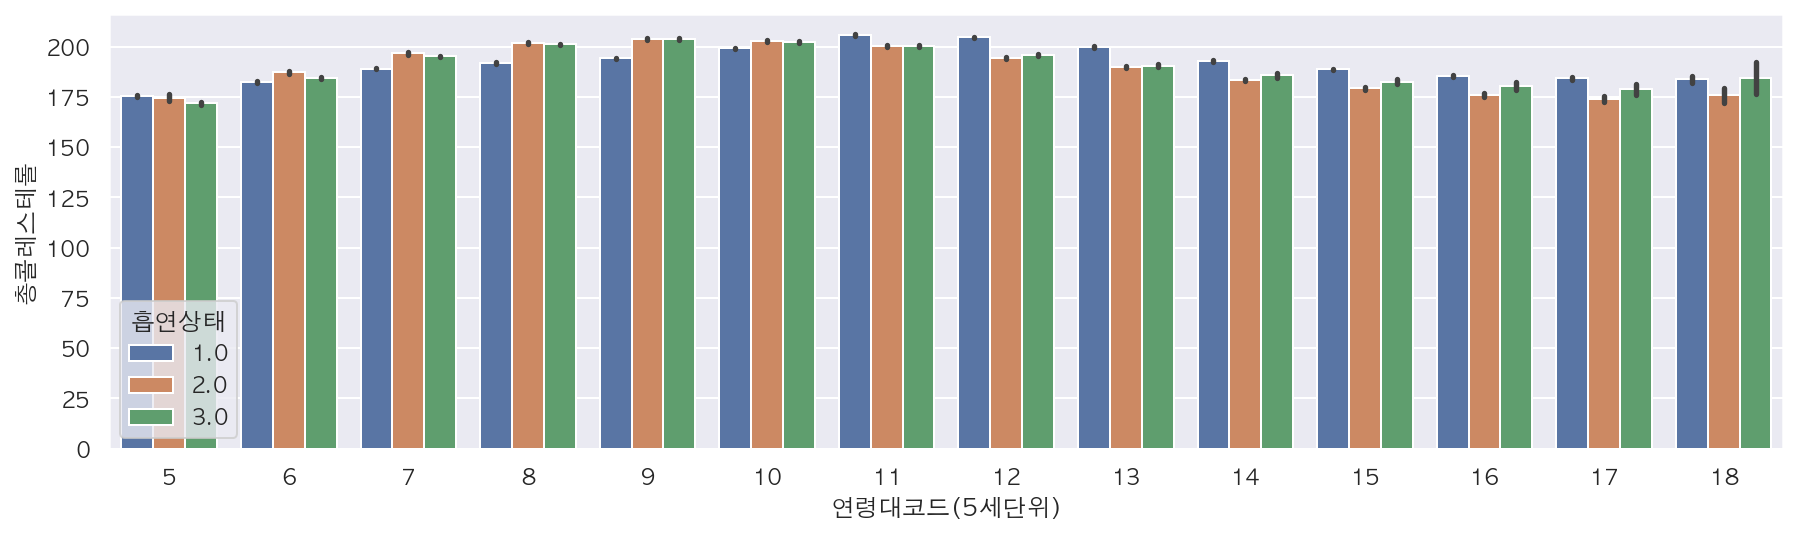

In [80]:
plt.figure(figsize=(15,4))
sns.barplot(data=df, x='연령대코드(5세단위)', y='총콜레스테롤', hue='흡연상태') # 총 콜레스테롤의 평균값을 표현해준다.

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

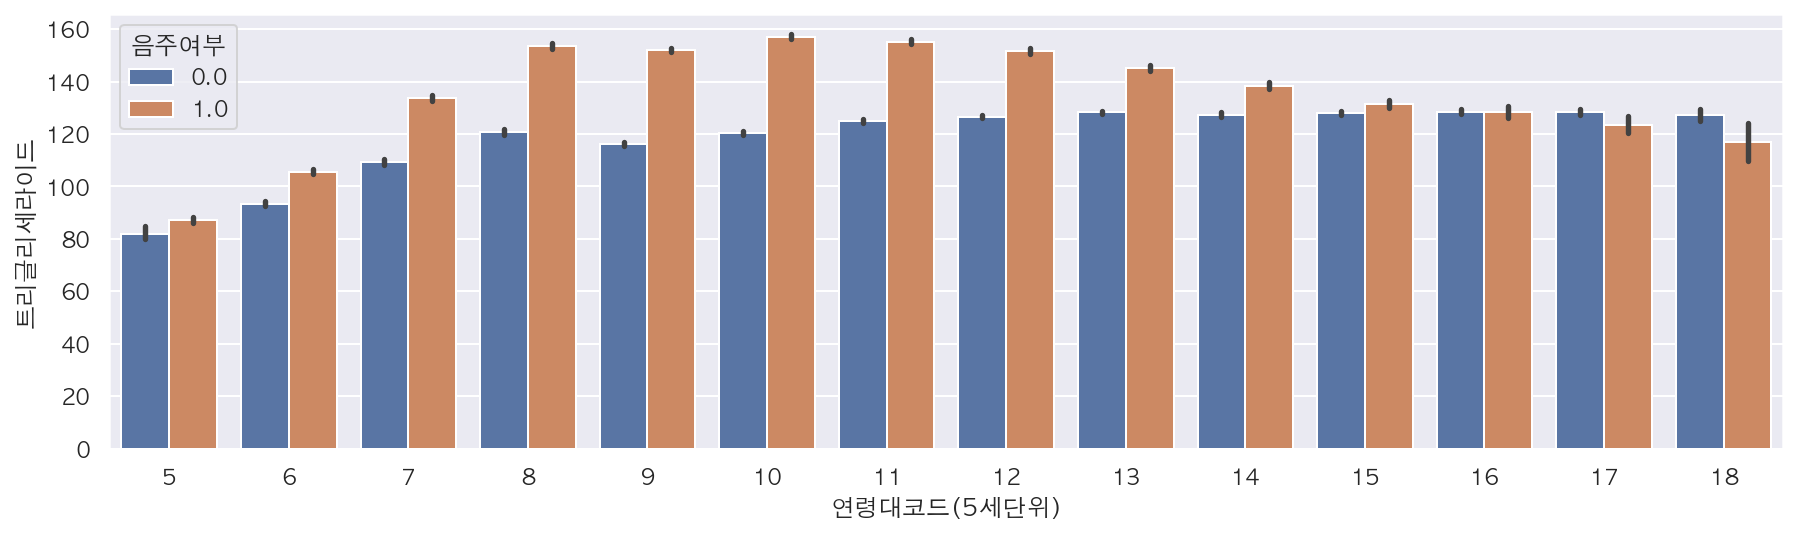

In [88]:
plt.figure(figsize=(15,4))
sns.barplot(data=df, x='연령대코드(5세단위)', y='트리글리세라이드', hue='음주여부') # 트리글리세라이드(중성지방) 평균값을 표현해준다.

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

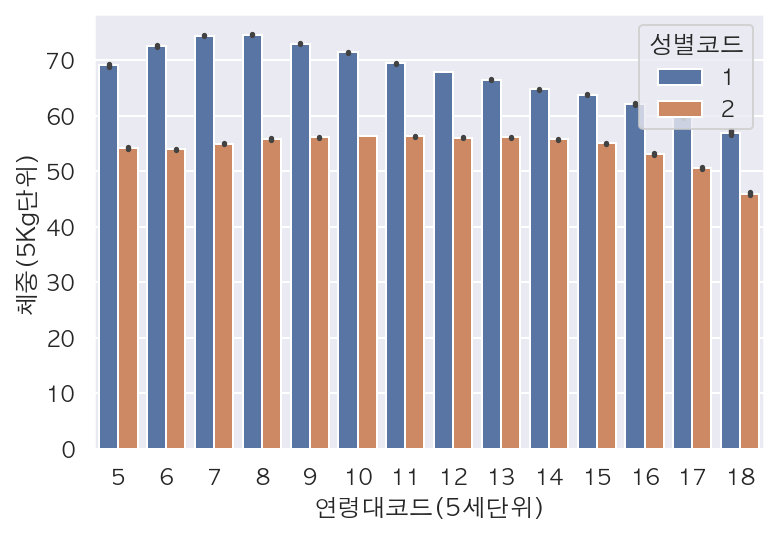

In [89]:
sns.barplot(data=df, x='연령대코드(5세단위)', y='체중(5Kg단위)', hue='성별코드')

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

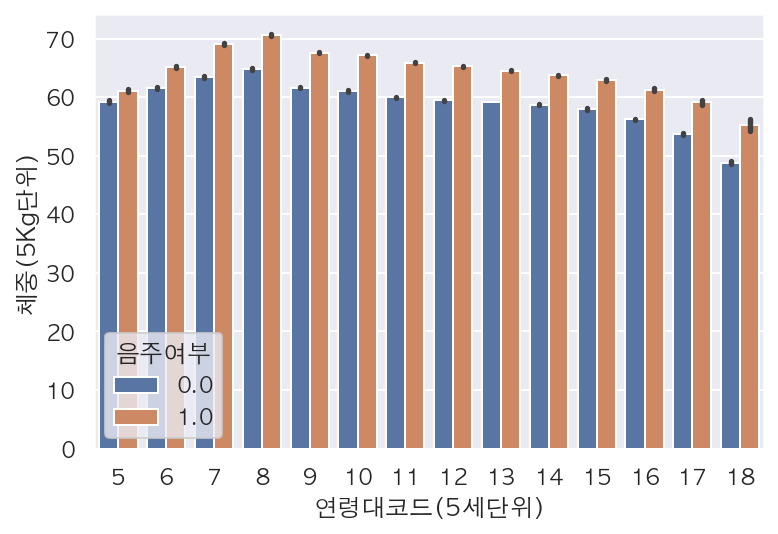

In [90]:
sns.barplot(data=df, x='연령대코드(5세단위)', y='체중(5Kg단위)', hue='음주여부')

## lineplot  and pointplot

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

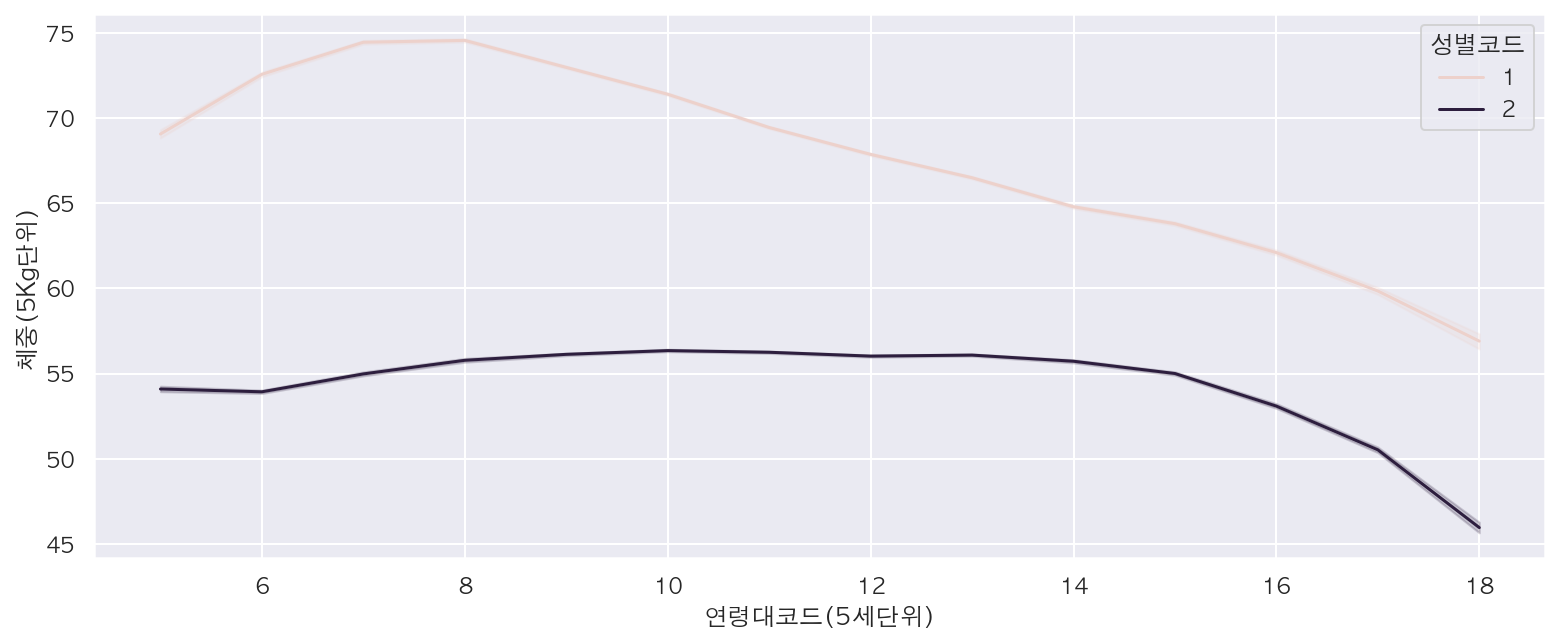

In [92]:
plt.figure(figsize=(13, 5))
sns.lineplot(data=df, x='연령대코드(5세단위)', y='체중(5Kg단위)', hue='성별코드')

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

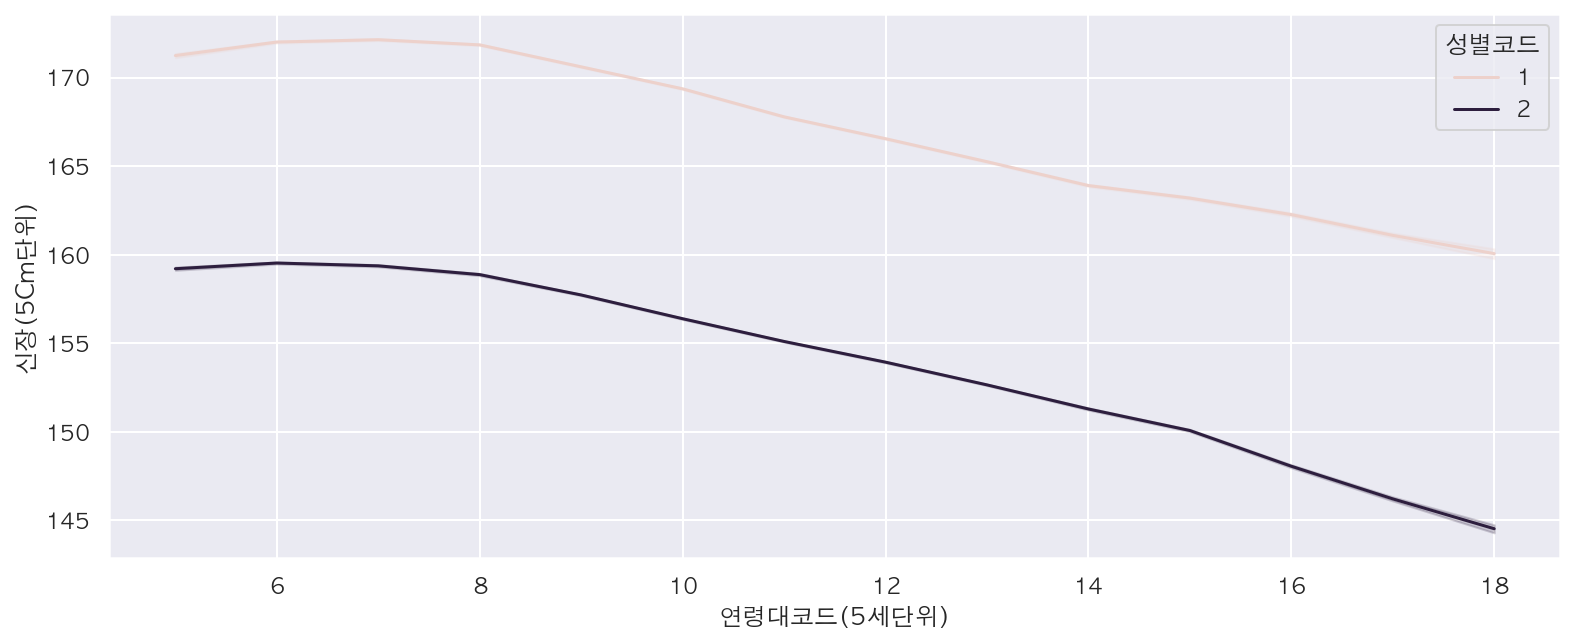

In [93]:
plt.figure(figsize=(13, 5))
sns.lineplot(data=df, x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='성별코드')

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

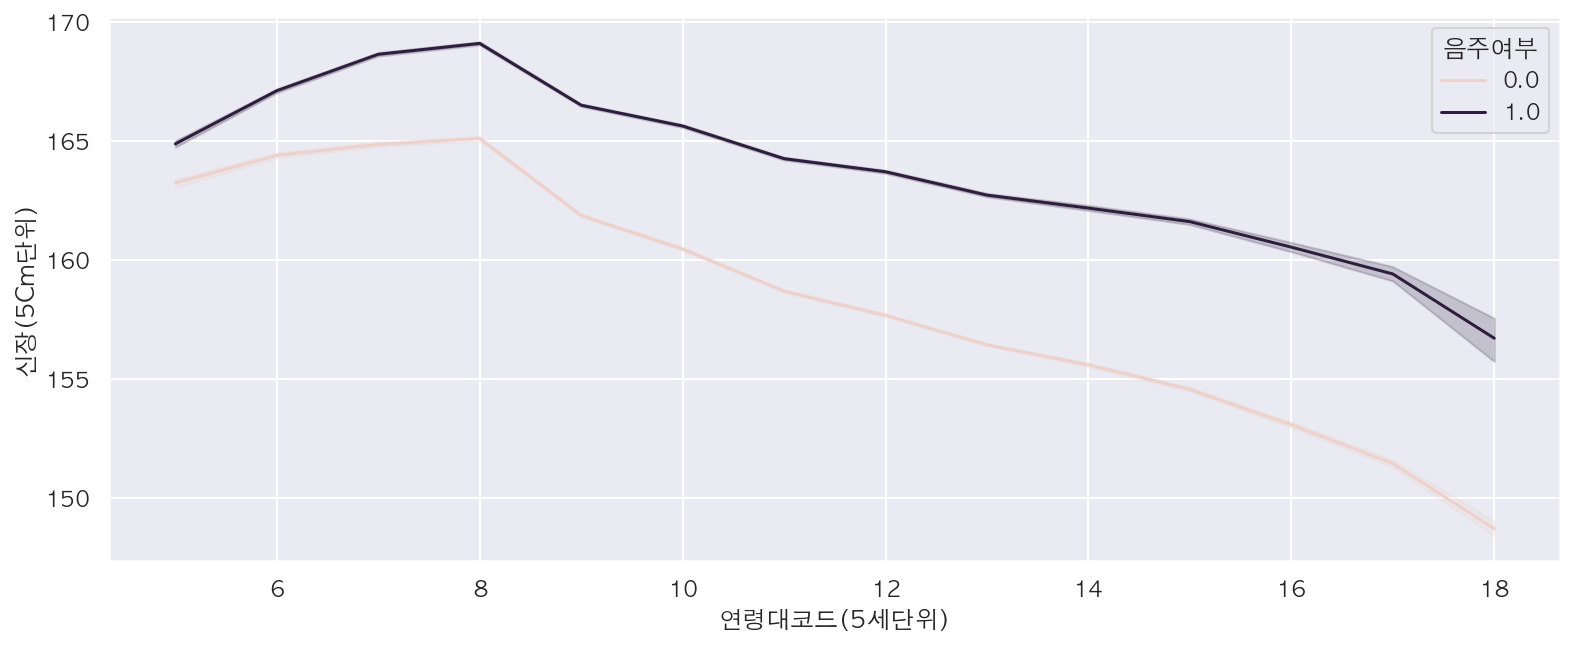

In [94]:
plt.figure(figsize=(13, 5))
sns.lineplot(data=df, x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='음주여부')

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

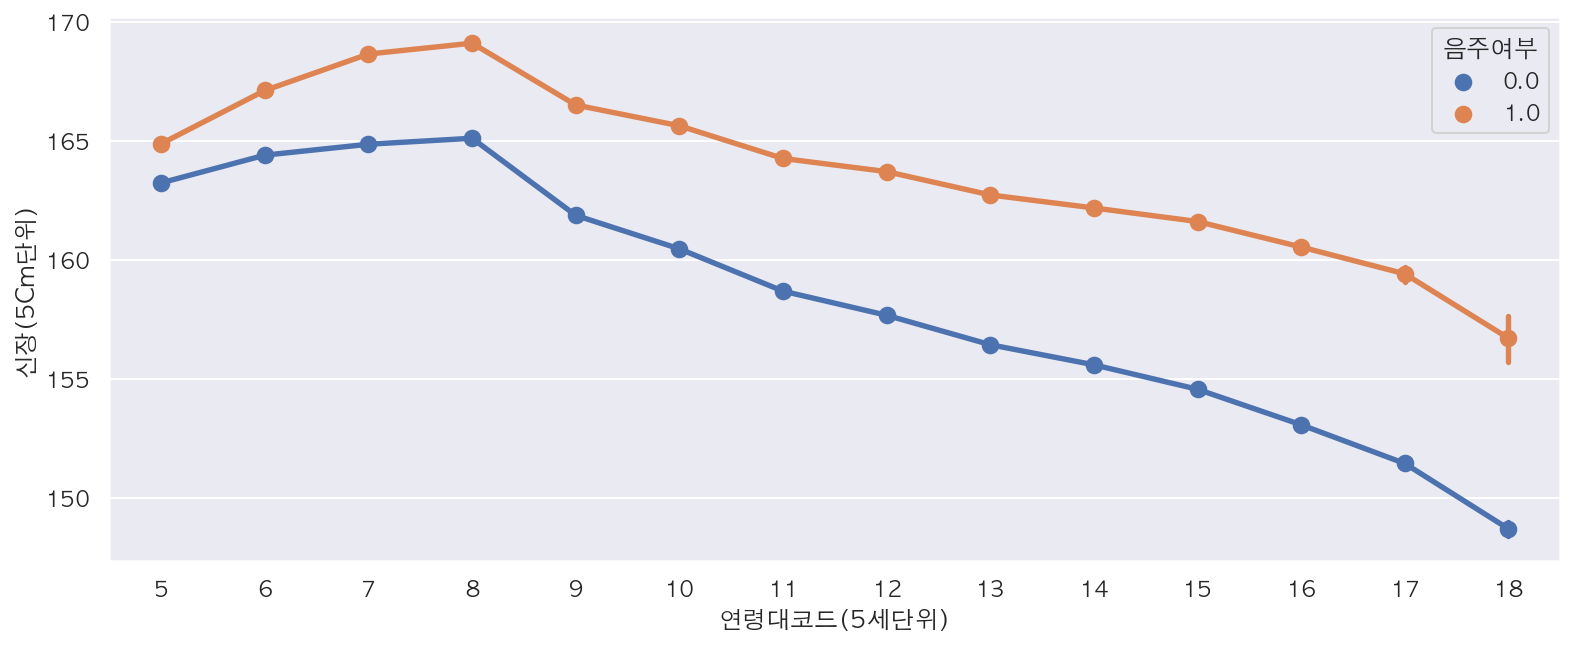

In [95]:
plt.figure(figsize=(13, 5))
sns.pointplot(data=df, x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='음주여부')

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

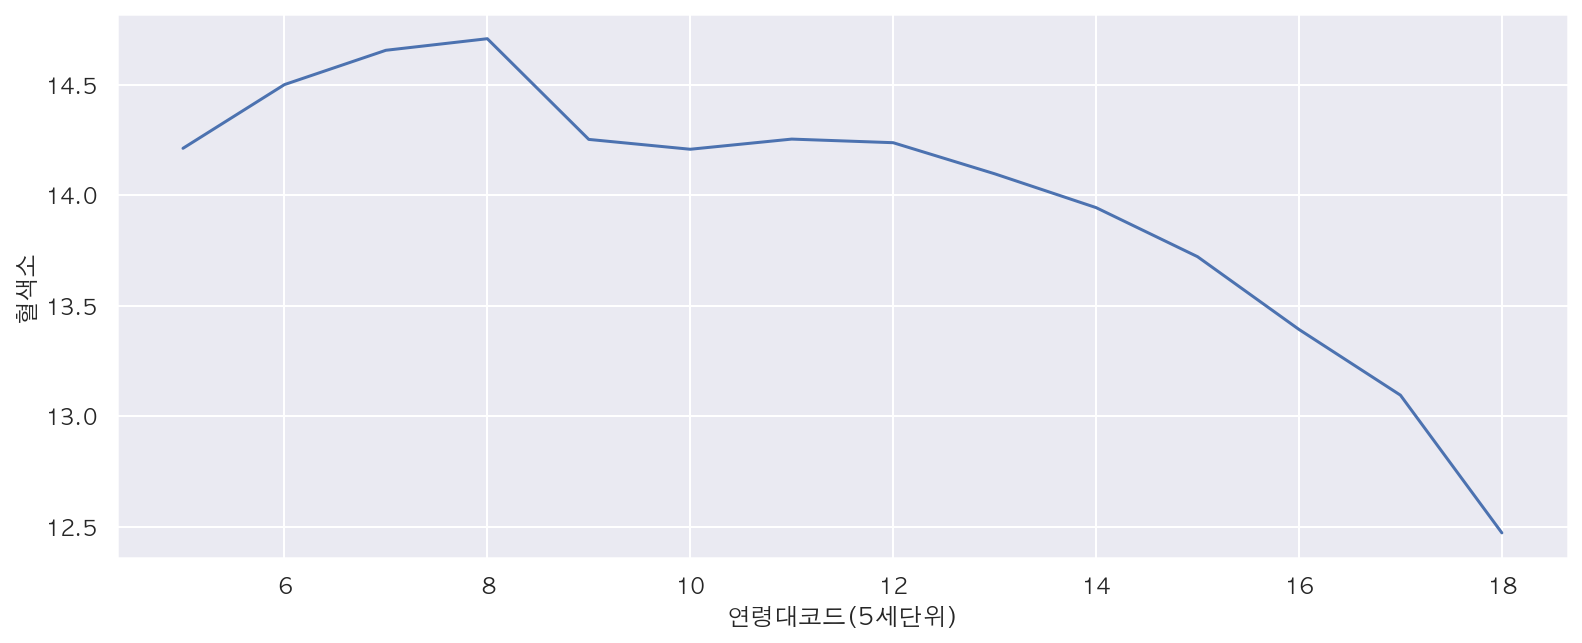

In [97]:
plt.figure(figsize=(13, 5))
sns.lineplot(data=df, x='연령대코드(5세단위)', y='혈색소')

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

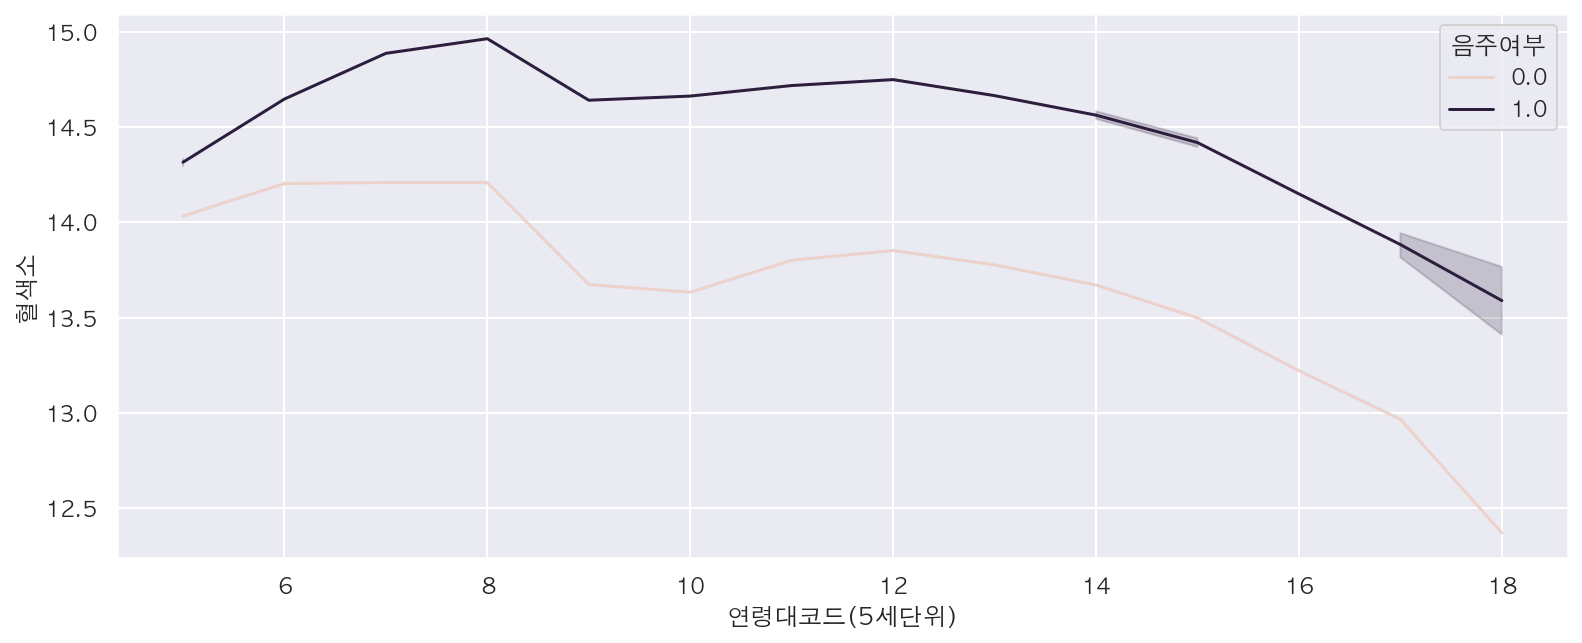

In [98]:
plt.figure(figsize=(13, 5))
sns.lineplot(data=df, x='연령대코드(5세단위)', y='혈색소', hue='음주여부')

## boxplot
- 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계랑인 5가지 요약 수치로 그린다.
- 5가지 요약 수치란 기술 통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 의미한다.
1. 최솟값
2. 제 1사분위수
3. 제 2사분위수, 중앙값
4. 제 3사분위수
5. 최댓값

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

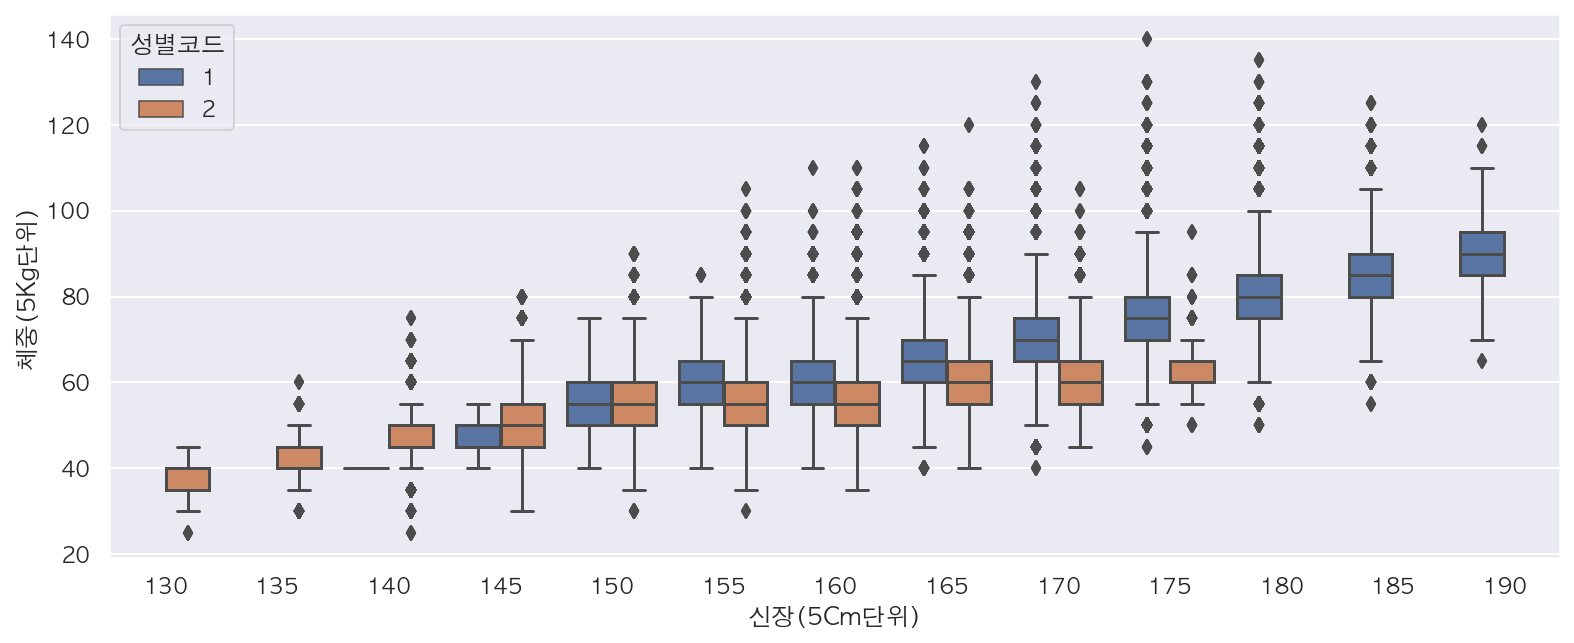

In [101]:
plt.figure(figsize=(13, 5))
sns.boxplot(data=df, x='신장(5Cm단위)', y='체중(5Kg단위)', hue='성별코드')

## violinplot

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

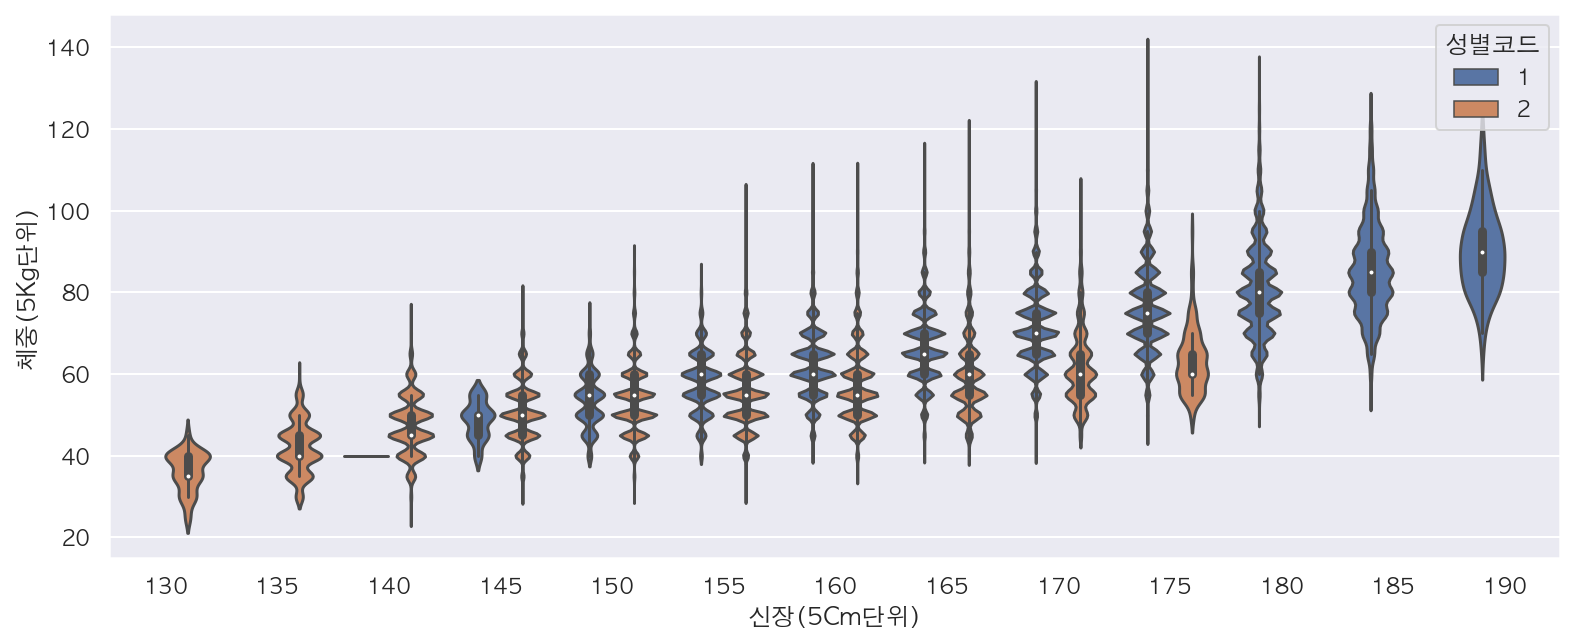

In [104]:
plt.figure(figsize=(13, 5))
sns.violinplot(data=df, x='신장(5Cm단위)', y='체중(5Kg단위)', hue='성별코드')

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

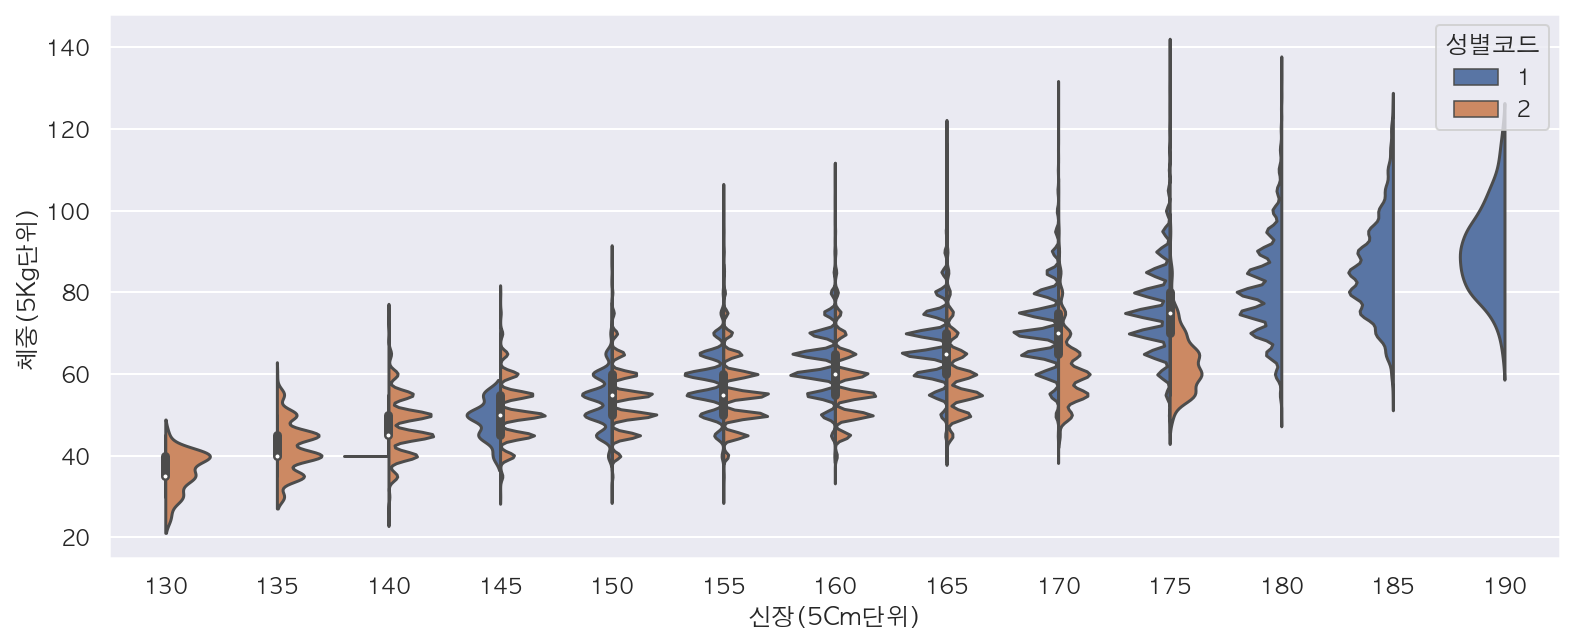

In [105]:
plt.figure(figsize=(13, 5))
sns.violinplot(data=df, x='신장(5Cm단위)', y='체중(5Kg단위)', hue='성별코드', split=True)

## swarm plot & lmplot
- 범주형 데이터를 산점도로 시각화하고자 할 때 사용합니다.

/Users/yangjaeug/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yangjaeug/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 36.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yangjaeug/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 43.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yangjaeug/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yangjaeug/opt/anaconda3/lib/python

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

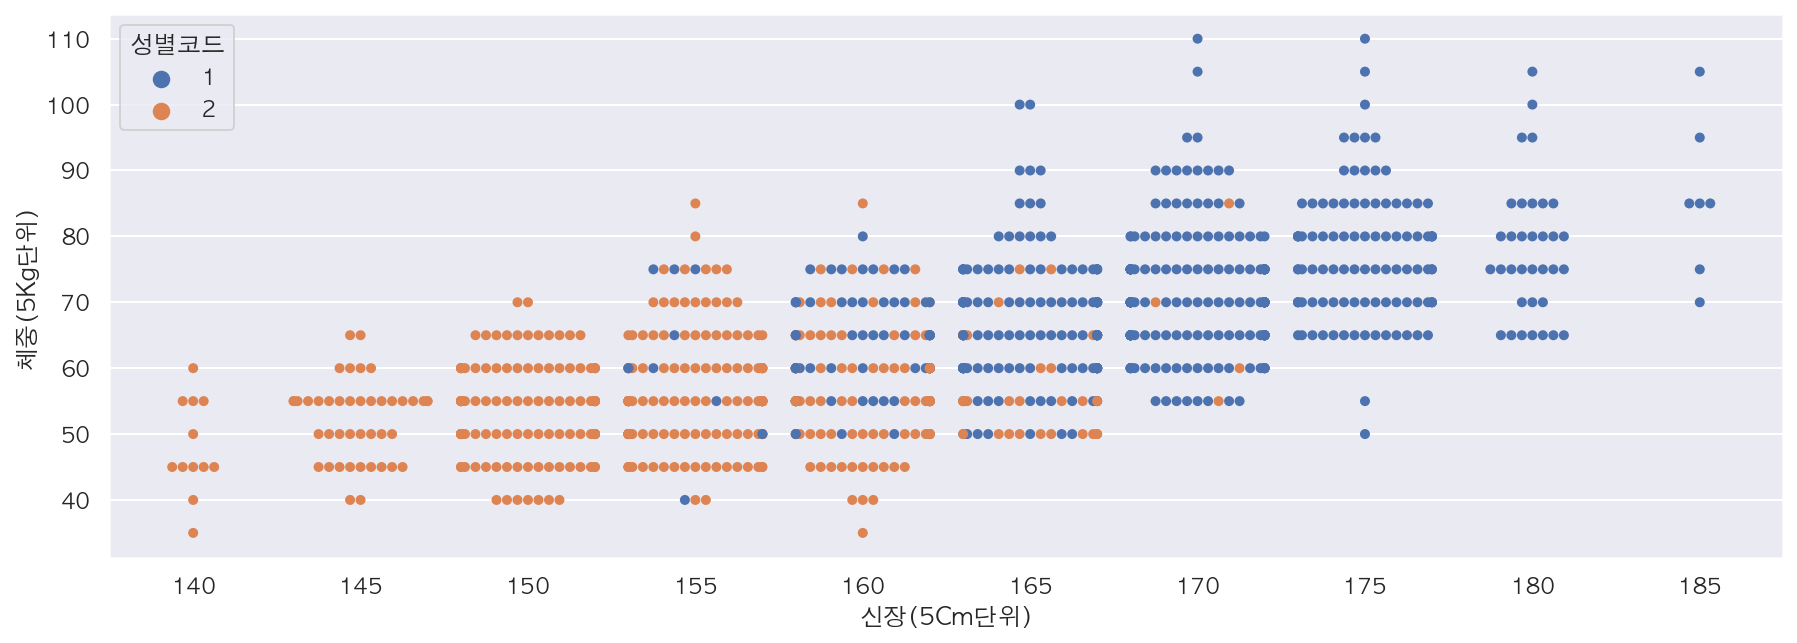

In [108]:
# 점을 하나씩 찍기 때문에 오래 걸리는 코드는 전체로 그려보기 전에 일부만 가져와 그려보자.
plt.figure(figsize=(15, 5))
sns.swarmplot(data=df_sample, x='신장(5Cm단위)', y='체중(5Kg단위)', hue='성별코드')

/Users/yangjaeug/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yangjaeug/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yangjaeug/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 14.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yangjaeug/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 36.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yangjaeug/opt/anaconda3/lib/python

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

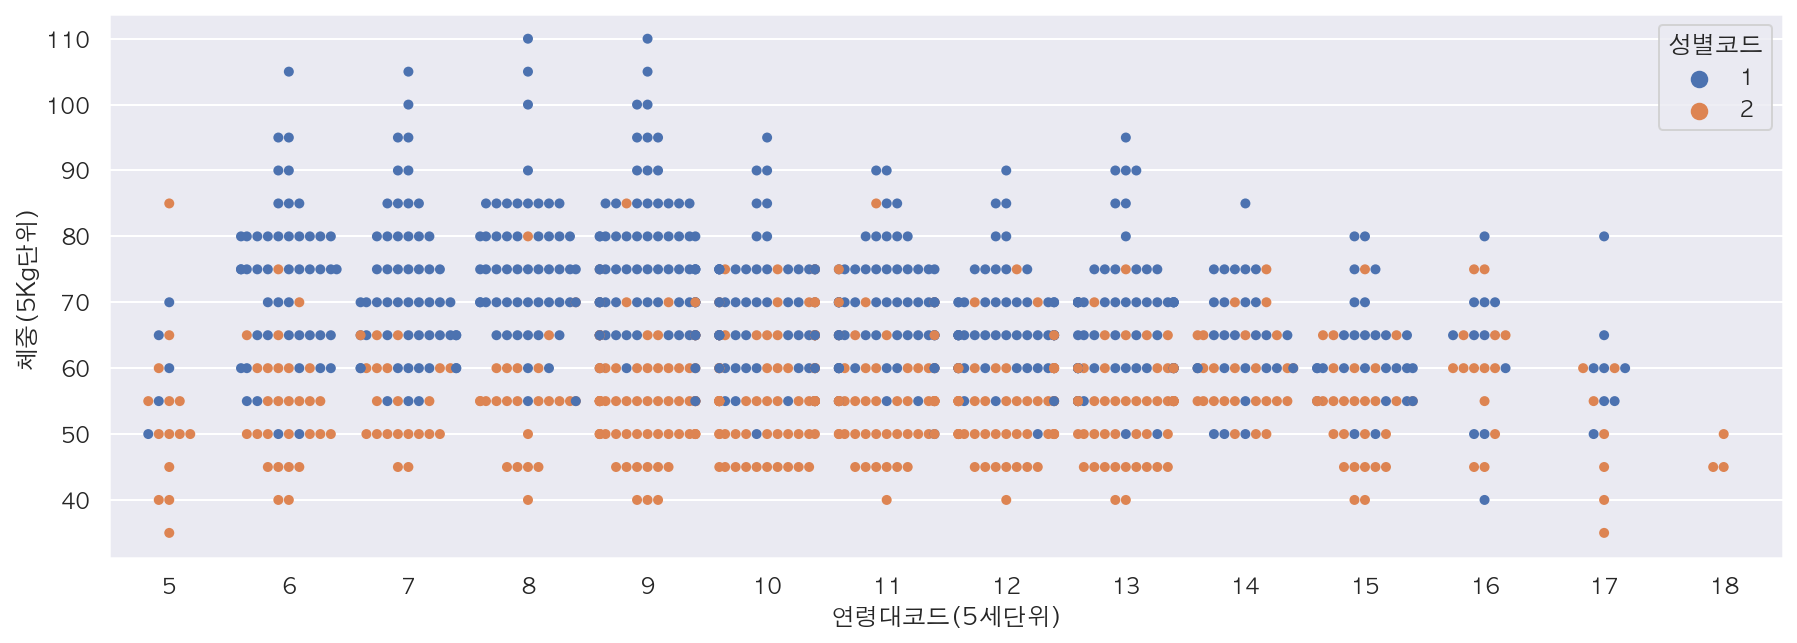

In [111]:
plt.figure(figsize=(15, 5))
sns.swarmplot(data=df_sample, x='연령대코드(5세단위)', y='체중(5Kg단위)', hue='성별코드')

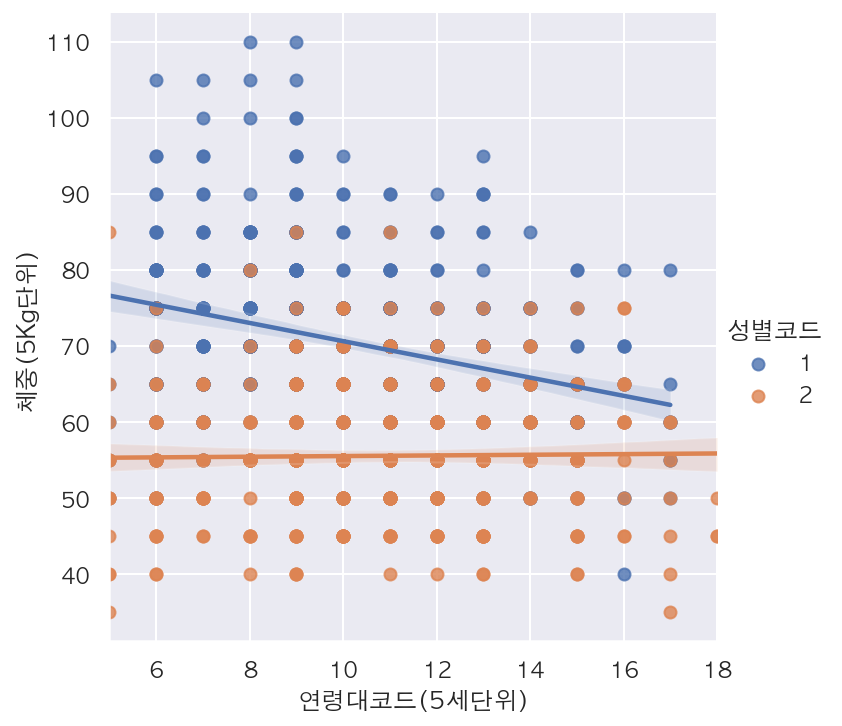

In [114]:
sns.lmplot(data=df_sample, x='연령대코드(5세단위)', y='체중(5Kg단위)', hue='성별코드')

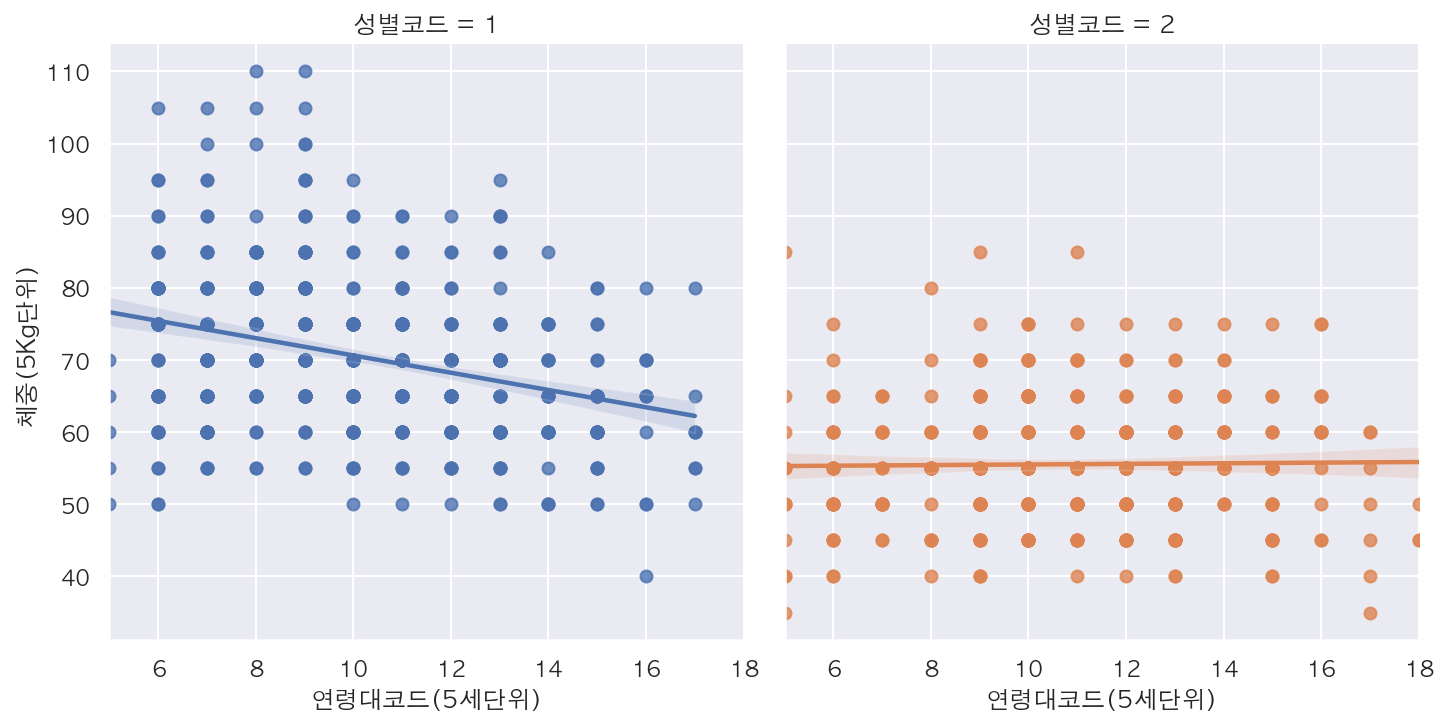

In [115]:
sns.lmplot(data=df_sample, x='연령대코드(5세단위)', y='체중(5Kg단위)', hue='성별코드', col='성별코드')

# 수치형 데이터 시각화
## scatterplot - 산점도
- 수치형 vs 수치형 데이터의 상관관계를 볼 때 주로 사용합니다.
- 점의 크기를 데이터의 수치에 따라 다르게 볼 수 있습니다.

<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

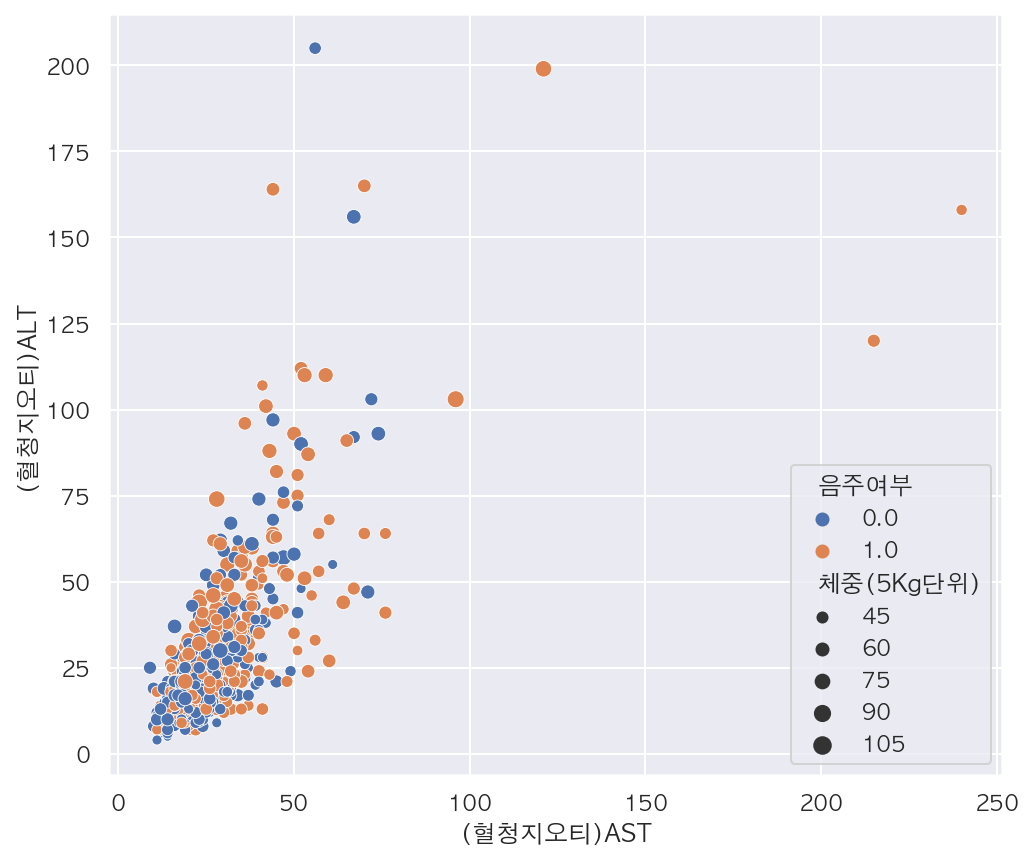

In [121]:
plt.figure(figsize=(8,7))
sns.scatterplot(data=df_sample, x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='음주여부', 
                size='체중(5Kg단위)')

## lmplot - 상관 관계를 보기

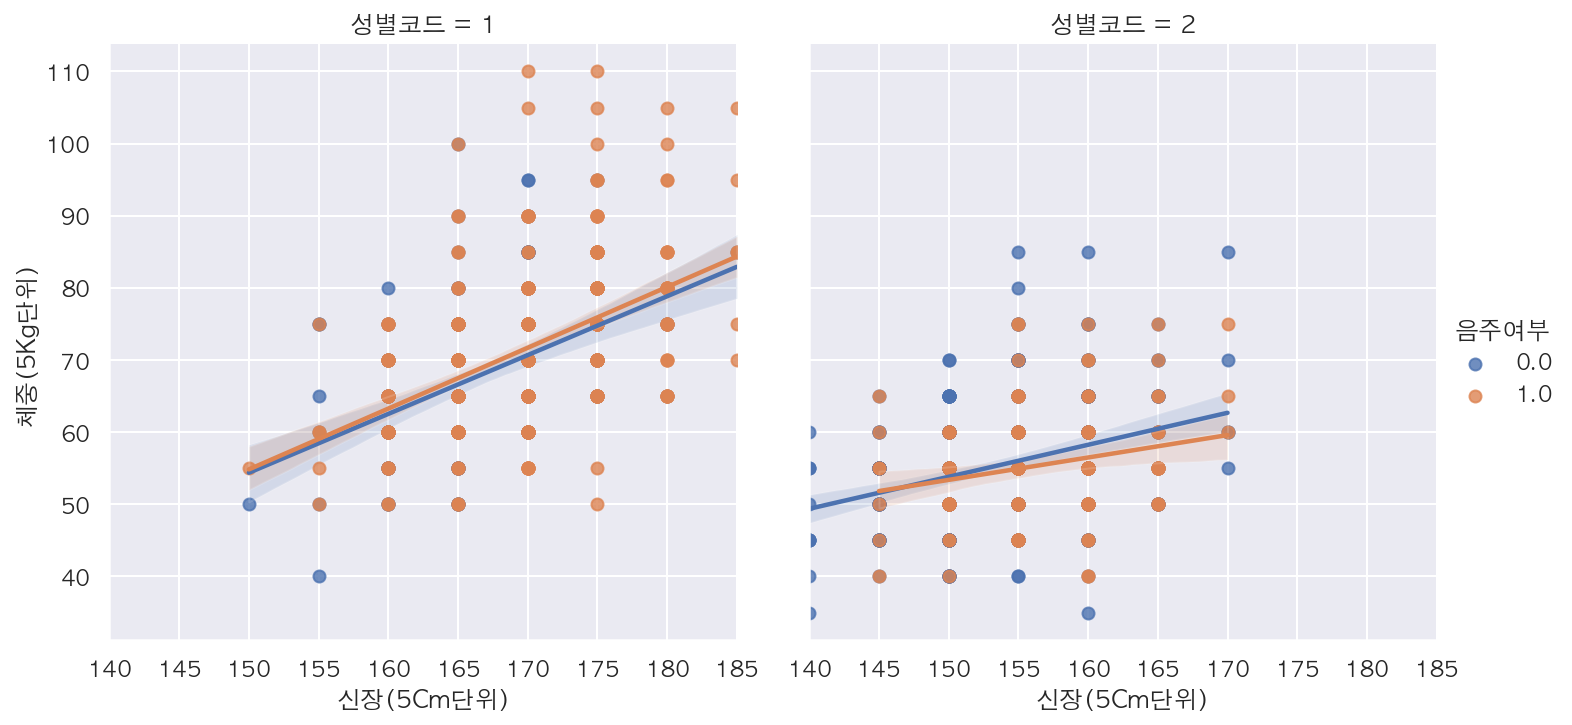

In [129]:
sns.lmplot(data=df_sample, x='신장(5Cm단위)', y='체중(5Kg단위)', hue='음주여부', col='성별코드')

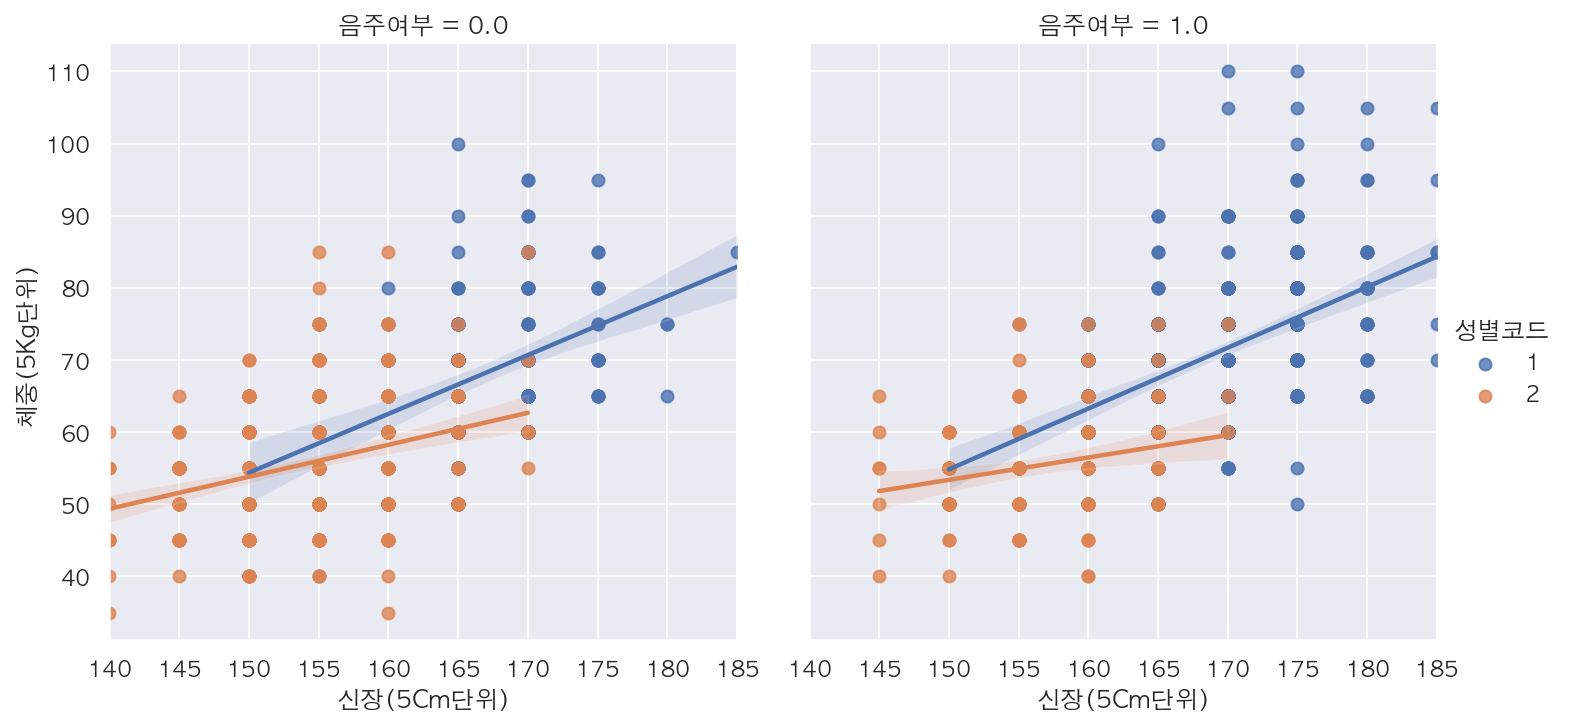

In [130]:
sns.lmplot(data=df_sample, x='신장(5Cm단위)', y='체중(5Kg단위)', hue='성별코드', col='음주여부')

`AST와 ALT`
- 출처 : https://sev.iseverance.com/dept_clinic/center/liver/treatment/view.asp?con_no=87827

AST와 ALT는 간세포에 들어있는 효소 입니다.
간이 손상돼 간세포가 파괴되면 그 안에 있던 AST와 ALT가 빠져나와 혈액 속에 섞여 돌아다니게 됩니다. 따라서 간이 손상되면 AST와 ALT 수치가 높아집니다.
정상 수치는 병원에 따라 기준치가 다소 차이가 있으나 AST가 5~35 IU/L, ALT가 5~40 IU/L 정도 입니다.

간혹 전날 술을 마시거나 몸이 피곤하면 일시적으로 AST와 ALT 수치가 정상치를 웃돌 수 있으므로 딱 한 번의 검사만으로 간질환 여부를 판단하는 경우는 드뭅니다. 하지만 AST와 ALT 같은 간수치는 간의 상태를 일차원적으로 파악하는데 아주 중요한 기준이 됩니다.

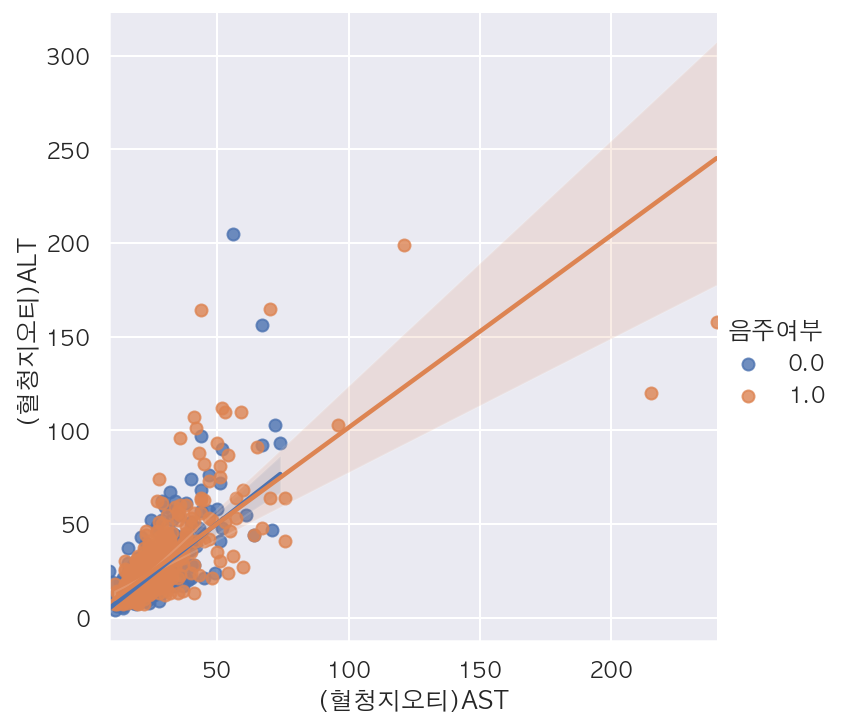

In [134]:
sns.lmplot(data=df_sample, x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='음주여부', robust=True)

## 이상치 다루기
- 이상치가 있으면 데이터가 자세히 보이지 않거나 이상치로 인해 회귀선이 달라지기도 합니다.
- 시각화를 통해 찾은 이상치를 제거하고 보거나 이상치만 따로 모아 보도록 합니다.

In [144]:
df_ASLT = df_sample[(df_sample['(혈청지오티)AST'] < 400) & (df_sample['(혈청지오티)ALT'] < 400)]

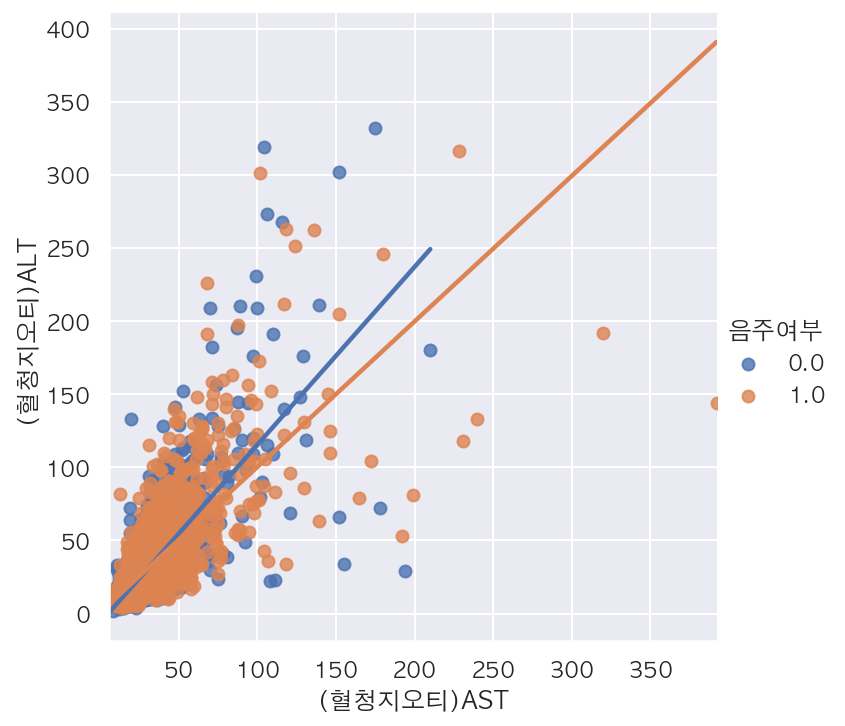

In [145]:
sns.lmplot(data=df_ASLT, x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='음주여부', ci=None)

In [148]:
df_ASLT_high = df_sample[(df_sample['(혈청지오티)AST'] > 200) | (df_sample['(혈청지오티)ALT'] > 200)]
df_ASLT_high

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)   허리둘레  \
102267  2017   102268     1           12    28        175         60   67.0   
873278  2017   873279     1            7    27        180        120  115.0   
232480  2017   232481     1           13    46        160         50   78.0   
347593  2017   347594     1            5    27        170         90   96.1   
164440  2017   164441     2            5    26        150         45   66.0   
314310  2017   314311     1           12    41        165         60   79.0   
995323  2017   995324     1            7    11        185        105  101.4   
269097  2017   269098     1           11    41        165         65   81.0   
291942  2017   291943     1           11    11        170         70   81.0   
564135  2017   564136     1           15    26        160         55   86.0   
405750  2017   405751     1            5    27        175        105   89.0   
234004  2017   234005     1            7    11        165         75   92.0   
476221  2017   476222     1            7    46        180         85   89.0   
200200  2017   200201     1            8    48        170         75   83.1   
277533  2017   277534     2           11    47        155         60   76.5   
728010  2017   728011     1            9    36        175         75   88.0   
382618  2017   382619     1           10    11        175         80   92.0   
502990  2017   502991     2            9    28        170         70   80.8   
661039  2017   661040     1            8    27        180         90  100.0   
742785  2017   742786     1            9    41        170         60   74.0   
542568  2017   542569     1            9    41        160         90  104.8   
611994  2017   611995     2           10    28        155         55   78.5   
217376  2017   217377     1            8    41        180         90   91.0   
529427  2017   529428     1           12    47        155         75   97.0   
742803  2017   742804     1            7    47        175        130  114.0   
445692  2017   445693     1            6    29        175         95   98.0   
799611  2017   799612     1           13    47        160         50   76.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
102267    1.5    1.2  ...   44.0   2.0   0.0         0      NaN    NaN   
873278    1.0    1.5  ...   98.0   2.0   1.0         0      NaN    NaN   
232480    1.0    0.9  ...  999.0   3.0   1.0         0      NaN    NaN   
347593    1.0    1.2  ...   55.0   1.0   0.0         0      NaN    NaN   
164440    0.8    0.8  ...  450.0   3.0   1.0         0      NaN    NaN   
314310    0.9    1.2  ...  346.0   3.0   1.0         0      NaN    NaN   
995323    0.7    0.7  ...  174.0   3.0   1.0         0      NaN    NaN   
269097    1.0    1.2  ...  343.0   3.0   1.0         0      NaN    NaN   
291942    0.9    1.0  ...  392.0   2.0   0.0         1      NaN    NaN   
564135    1.0    1.0  ...  217.0   2.0   1.0         0      NaN    NaN   
405750    1.0    1.2  ...   76.0   1.0   0.0         0      NaN    NaN   
234004    0.3    0.3  ...  120.0   1.0   1.0         0      NaN    NaN   
476221    1.2    1.2  ...   98.0   3.0   0.0         1      NaN    NaN   
200200    1.0    1.2  ...   48.0   1.0   0.0         0      NaN    NaN   
277533    0.5    1.2  ...  167.0   1.0   0.0         0      NaN    NaN   
728010    1.0    1.0  ...  232.0   2.0   1.0         1      NaN    NaN   
382618    1.2    1.2  ...  315.0   1.0   1.0         1      NaN    NaN   
502990    1.0    1.2  ...  156.0   1.0   0.0         1      NaN    NaN   
661039    1.2    1.2  ...  171.0   2.0   1.0         0      NaN    NaN   
742785    0.6    0.8  ...  691.0   3.0   1.0         0      NaN    NaN   
542568    0.9    1.2  ...  155.0   2.0   1.0         0      NaN    NaN   
611994    0.9    0.9  ...  138.0   1.0   0.0         1      NaN    NaN   
217376    1.2    0.7  ...  108.0   3.0   0.0         1      NaN    NaN   
529427    1.0    0.

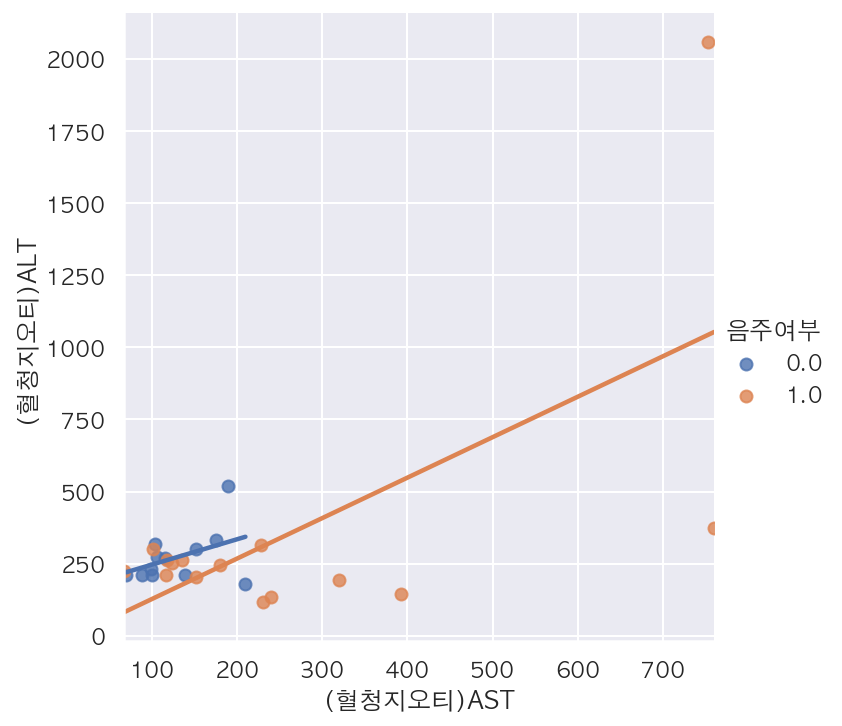

In [149]:
sns.lmplot(data=df_ASLT_high, x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='음주여부', ci=None)

## distplot
- 히스토그램 + 확률 밀도 함수

In [150]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [155]:
df_chol = df.loc[df['총콜레스테롤'].notnull(), '총콜레스테롤']
df_chol

0         193.0
1         228.0
2         136.0
3         201.0
4         199.0
          ...  
999995    198.0
999996    133.0
999997    205.0
999998    122.0
999999    225.0
Name: 총콜레스테롤, Length: 999957, dtype: float64

In [157]:
df_chol.describe()
# max에서 이상치가 존재하는것을 볼 수 있다.

count    999957.000000
mean        195.548251
std          38.718205
min          30.000000
25%         169.000000
50%         193.000000
75%         219.000000
max        2344.000000
Name: 총콜레스테롤, dtype: float64

/Users/yangjaeug/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

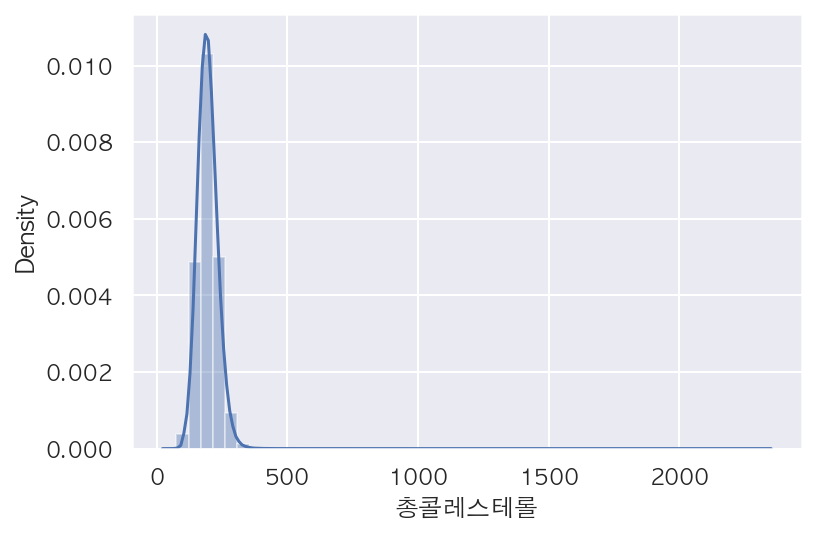

In [156]:
sns.distplot(df_chol)

/Users/yangjaeug/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

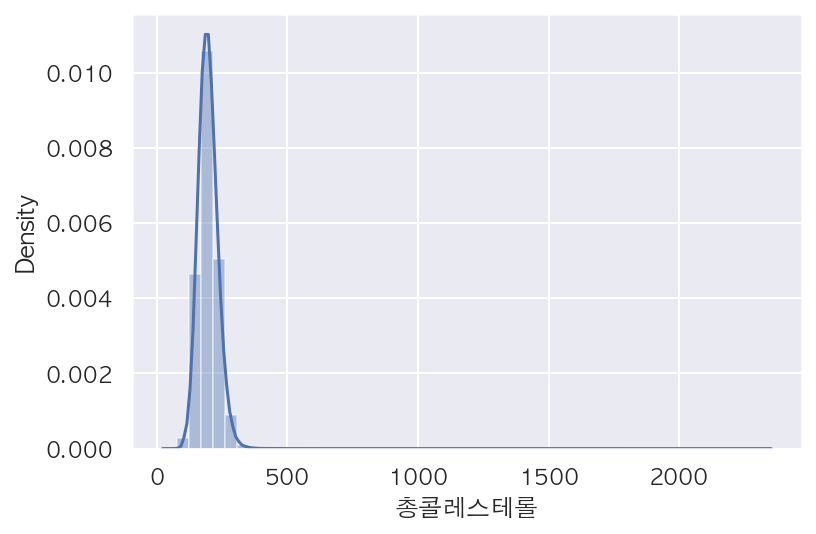

In [163]:
sns.distplot(df.loc[df['총콜레스테롤'].notnull() & (df['음주여부']==1), '총콜레스테롤'])

/Users/yangjaeug/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/yangjaeug/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

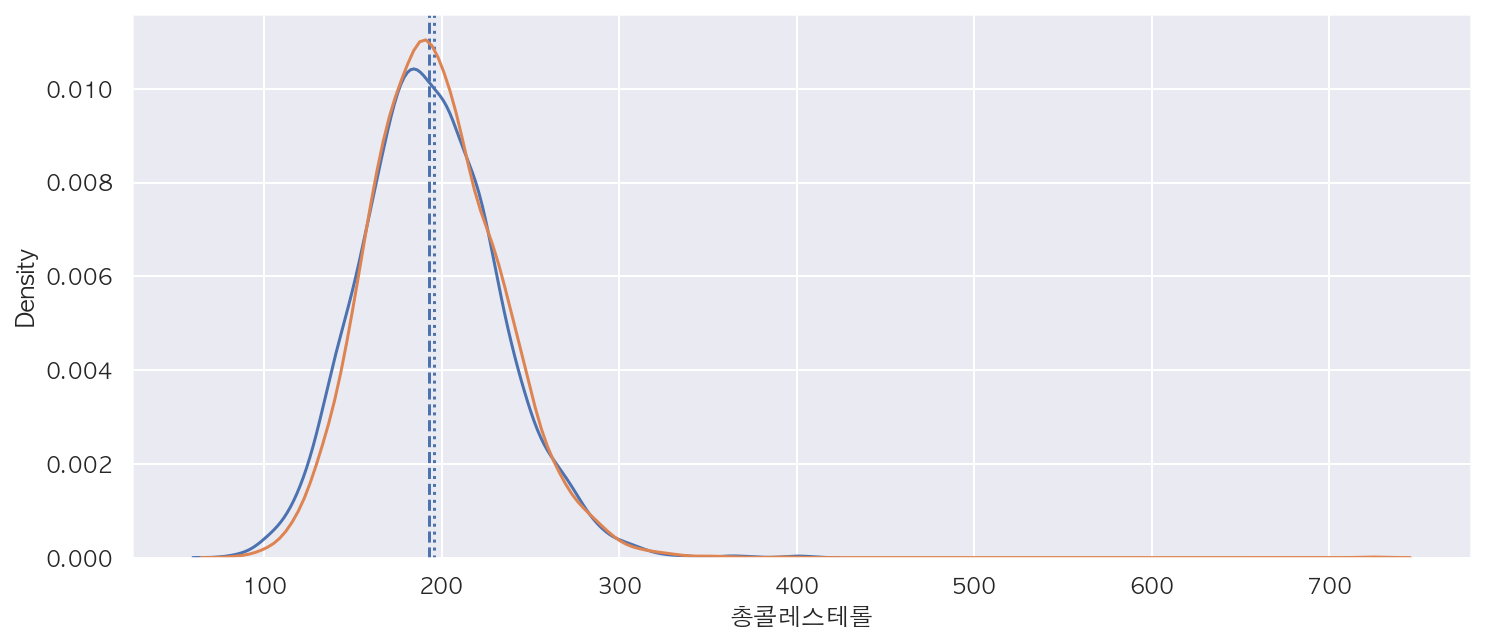

In [175]:
plt.figure(figsize=(12,5))
plt.axvline(df_sample['총콜레스테롤'].mean(), linestyle=":")
plt.axvline(df_sample['총콜레스테롤'].median(), linestyle="--")

sns.distplot(df_sample.loc[df_sample['총콜레스테롤'].notnull() & (df['음주여부']==0), '총콜레스테롤'], hist=False, label='음주 안 함')
sns.distplot(df_sample.loc[df_sample['총콜레스테롤'].notnull() & (df['음주여부']==1), '총콜레스테롤'], hist=False, label='음주 중')

# 상관 분석
r이 -1.0과 -0.7 사이라면, 강한 음적 선형관계,

r이 -0.7과 -0.3 사이라면, 뚜렷한 음적 선형관계,

r이 -0.3과 -0.1 사이라면, 약한 음적 선형관계,

r이 -0.1과 +0.1 사이라면, 거의 무시될 수 있는 선형관계,

r이 +0.1과 +0.3 사이라면, 약한 양적 선형관계,

r이 +0.3과 +0.7 사이라면, 뚜렷한 양적 선형관계,

r이 +0.7과 +1.0 사이라면, 강한 양적 선형관계

In [179]:
columns = ['연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', 
           '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', 
           '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', 
           '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', 
           '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부']
columns

['연령대코드(5세단위)',
 '신장(5Cm단위)',
 '체중(5Kg단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '음주여부']

## 상관계수 구하기

In [185]:
df_small = df_sample[columns]
df_corr = df_small.corr()
df_corr

연령대코드(5세단위)  신장(5Cm단위)  체중(5Kg단위)      허리둘레     시력(좌)     시력(우)  \
연령대코드(5세단위)     1.000000  -0.388806  -0.195610  0.110053 -0.166777 -0.149780   
신장(5Cm단위)      -0.388806   1.000000   0.672288  0.246255  0.118300  0.123152   
체중(5Kg단위)      -0.195610   0.672288   1.000000  0.561011  0.058878  0.061782   
허리둘레            0.110053   0.246255   0.561011  1.000000 -0.007161 -0.004114   
시력(좌)          -0.166777   0.118300   0.058878 -0.007161  1.000000  0.390795   
시력(우)          -0.149780   0.123152   0.061782 -0.004114  0.390795  1.000000   
청력(좌)           0.204107  -0.076428  -0.035211  0.034945 -0.021945 -0.024203   
청력(우)           0.197113  -0.080288  -0.035191  0.032934 -0.039046 -0.033145   
수축기혈압           0.265825   0.037449   0.247636  0.233081 -0.047012 -0.036796   
이완기혈압           0.106739   0.110397   0.280867  0.214982 -0.017449 -0.012793   
식전혈당(공복혈당)      0.201002   0.023770   0.130556  0.147572 -0.025881 -0.028200   
총콜레스테롤          0.012800  -0.008882   0.078258  0.056514 -0.006432 -0.003878   
트리글리세라이드        0.051765   0.148249   0.283340  0.219765  0.002328  0.014149   
HDL콜레스테롤       -0.116523  -0.168323  -0.323032 -0.253952  0.005573 -0.001019   
LDL콜레스테롤        0.027000  -0.006642   0.083529  0.057745 -0.009771 -0.010210   
혈색소            -0.166765   0.536891   0.501418  0.263068  0.061886  0.072186   
요단백             0.041853   0.005497   0.030287  0.037539 -0.019282 -0.019696   
혈청크레아티닌         0.036090   0.229443   0.209943  0.118932  0.027254  0.037845   
(혈청지오티)AST      0.066221   0.065113   0.143491  0.119222 -0.016376 -0.016992   
(혈청지오티)ALT     -0.031175   0.151934   0.275974  0.181662  0.008295  0.002223   
감마지티피           0.014469   0.166115   0.215097  0.166399 -0.001814  0.010802   
흡연상태           -0.125535   0.468473   0.375395  0.182823  0.041909  0.060305   
음주여부           -0.277707   0.376323   0.264465  0.087242  0.042027  0.057062   

                청력(좌)     청력(우)     수축기혈압     이완기혈압  ...  HDL콜레스테롤  LDL콜레스테롤  \
연령대코드(5세단위)  0.204107  0.197113  0.265825  0.106739  ... -0.116523  0.027000   
신장(5Cm단위)   -0.076428 -0.080288  0.037449  0.110397  ... -0.168323 -0.006642   
체중(5Kg단위)   -0.035211 -0.035191  0.247636  0.280867  ... -0.323032  0.083529   
허리둘레         0.034945  0.032934  0.233081  0.214982  ... -0.253952  0.057745   
시력(좌)       -0.021945 -0.039046 -0.047012 -0.017449  ...  0.005573 -0.009771   
시력(우)       -0.024203 -0.033145 -0.036796 -0.012793  ... -0.001019 -0.010210   
청력(좌)        1.000000  0.565078  0.055875  0.005960  ... -0.047572 -0.019362   
청력(우)        0.565078  1.000000  0.044339 -0.003343  ... -0.049596 -0.023892   
수축기혈압        0.055875  0.044339  1.000000  0.739963  ... -0.124431  0.042347   
이완기혈압        0.005960 -0.003343  0.739963  1.000000  ... -0.114494  0.074180   
식전혈당(공복혈당)   0.032765  0.040056  0.192697  0.137876  ... -0.126260 -0.054597   
총콜레스테롤      -0.024716 -0.033543  0.075387  0.114778  ...  0.183038  0.883031   
트리글리세라이드     0.021781  0.015440  0.173161  0.190310  ... -0.368646 -0.002322   
HDL콜레스테롤    -0.047572 -0.049596 -0.124431 -0.114494  ...  1.000000 -0.036757   
LDL콜레스테롤    -0.019362 -0.023892  0.042347  0.074180  ... -0.036757  1.000000   
혈색소         -0.023885 -0.024769  0.164636  0.243805  ... -0.208704  0.098629   
요단백          0.011531  0.002341  0.078686  0.056095  ... -0.026842 -0.024006   
혈청크레아티닌      0.022266  0.008135  0.119894  0.097907  ... -0.146601 -0.022107   
(혈청지오티)AST   0.029323  0.015120  0.114604  0.102028  ... -0.072375 -0.001051   
(혈청지오티)ALT  -0.001661 -0.009792  0.107263  0.110810  ... -0.132291  0.044798   
감마지티피        0.010917 -0.002003  0.176075  0.190082  ... -0.060900 -0.006693   
흡연상태        -0.020214 -0.004672  0.088009  0.139030  ... -0.187596 -0.006640   
음주여부        -0.061738 -0.051673  0.040960  0.107169  ...  0.046300 -0.035825   

                  혈색소       요단백   혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT     감마지티피  \
연령대코드(5세단위) -0.166765  0.041853  0.036090    0.066221   -0.031175  0.014469   
신장(5Cm단위)    

In [187]:
df_corr['신장(5Cm단위)'].sort_values()
# 신장과 체중이 강한 양적 상관관계를 띠고 있다.
# 신장과 연령은 강한 음적 상관관계를 띠고 있다.

연령대코드(5세단위)   -0.388806
HDL콜레스테롤      -0.168323
청력(우)         -0.080288
청력(좌)         -0.076428
총콜레스테롤        -0.008882
LDL콜레스테롤      -0.006642
요단백            0.005497
식전혈당(공복혈당)     0.023770
수축기혈압          0.037449
(혈청지오티)AST     0.065113
이완기혈압          0.110397
시력(좌)          0.118300
시력(우)          0.123152
트리글리세라이드       0.148249
(혈청지오티)ALT     0.151934
감마지티피          0.166115
혈청크레아티닌        0.229443
허리둘레           0.246255
음주여부           0.376323
흡연상태           0.468473
혈색소            0.536891
체중(5Kg단위)      0.672288
신장(5Cm단위)      1.000000
Name: 신장(5Cm단위), dtype: float64

In [188]:
df_corr['음주여부'].sort_values()

연령대코드(5세단위)   -0.277707
청력(좌)         -0.061738
청력(우)         -0.051673
LDL콜레스테롤      -0.035825
요단백           -0.002990
식전혈당(공복혈당)     0.026504
총콜레스테롤         0.032704
수축기혈압          0.040960
시력(좌)          0.042027
HDL콜레스테롤       0.046300
시력(우)          0.057062
(혈청지오티)AST     0.058363
(혈청지오티)ALT     0.060911
혈청크레아티닌        0.070562
허리둘레           0.087242
이완기혈압          0.107169
트리글리세라이드       0.114120
감마지티피          0.207319
체중(5Kg단위)      0.264465
혈색소            0.299461
흡연상태           0.337353
신장(5Cm단위)      0.376323
음주여부           1.000000
Name: 음주여부, dtype: float64

## heatmap

<AxesSubplot:>

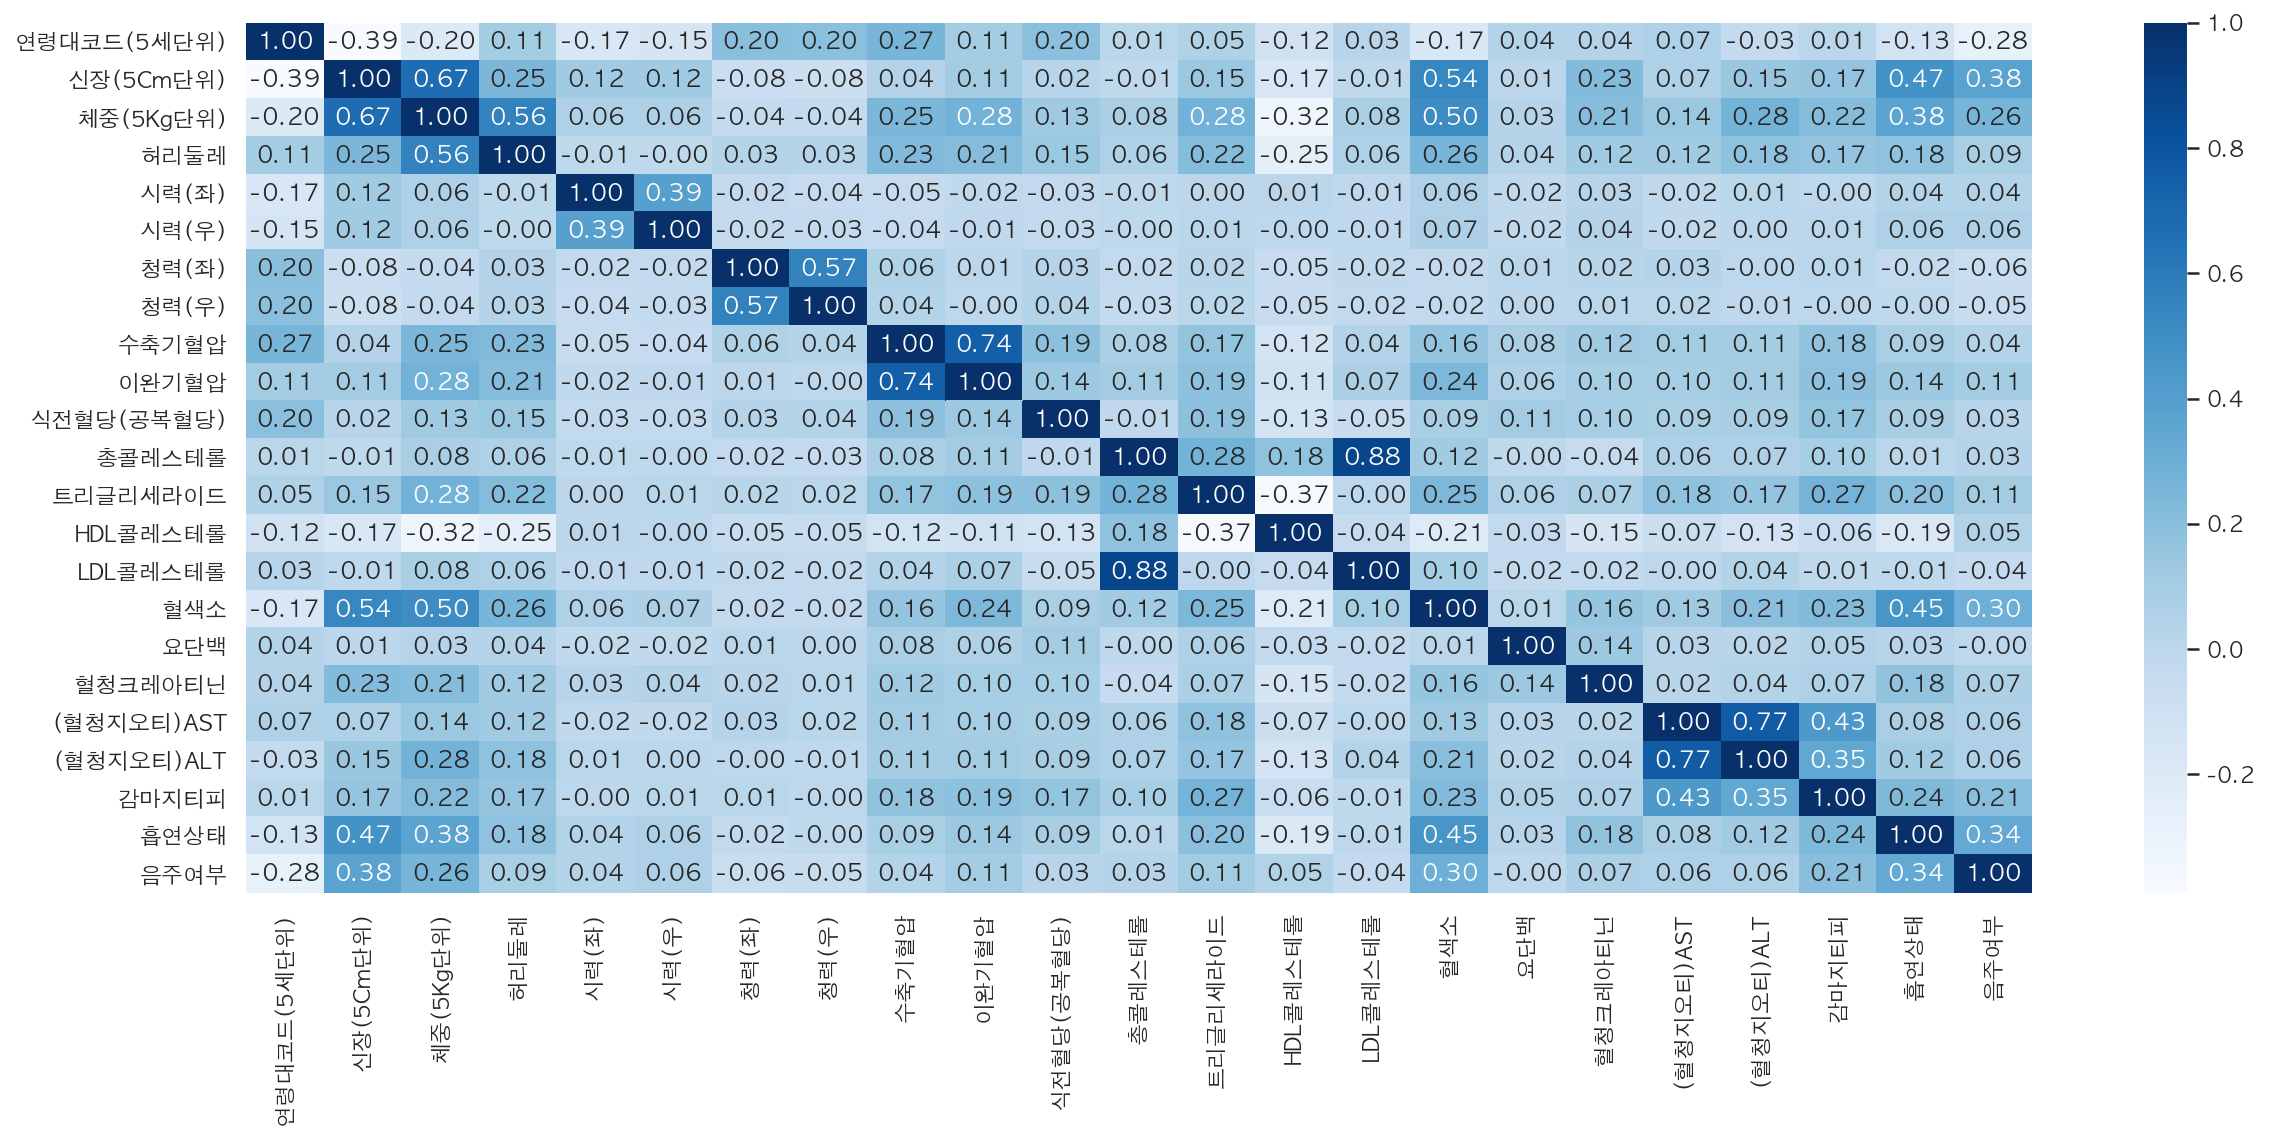

In [197]:
plt.figure(figsize=(20,8))
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='Blues')

In [198]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

<AxesSubplot:>

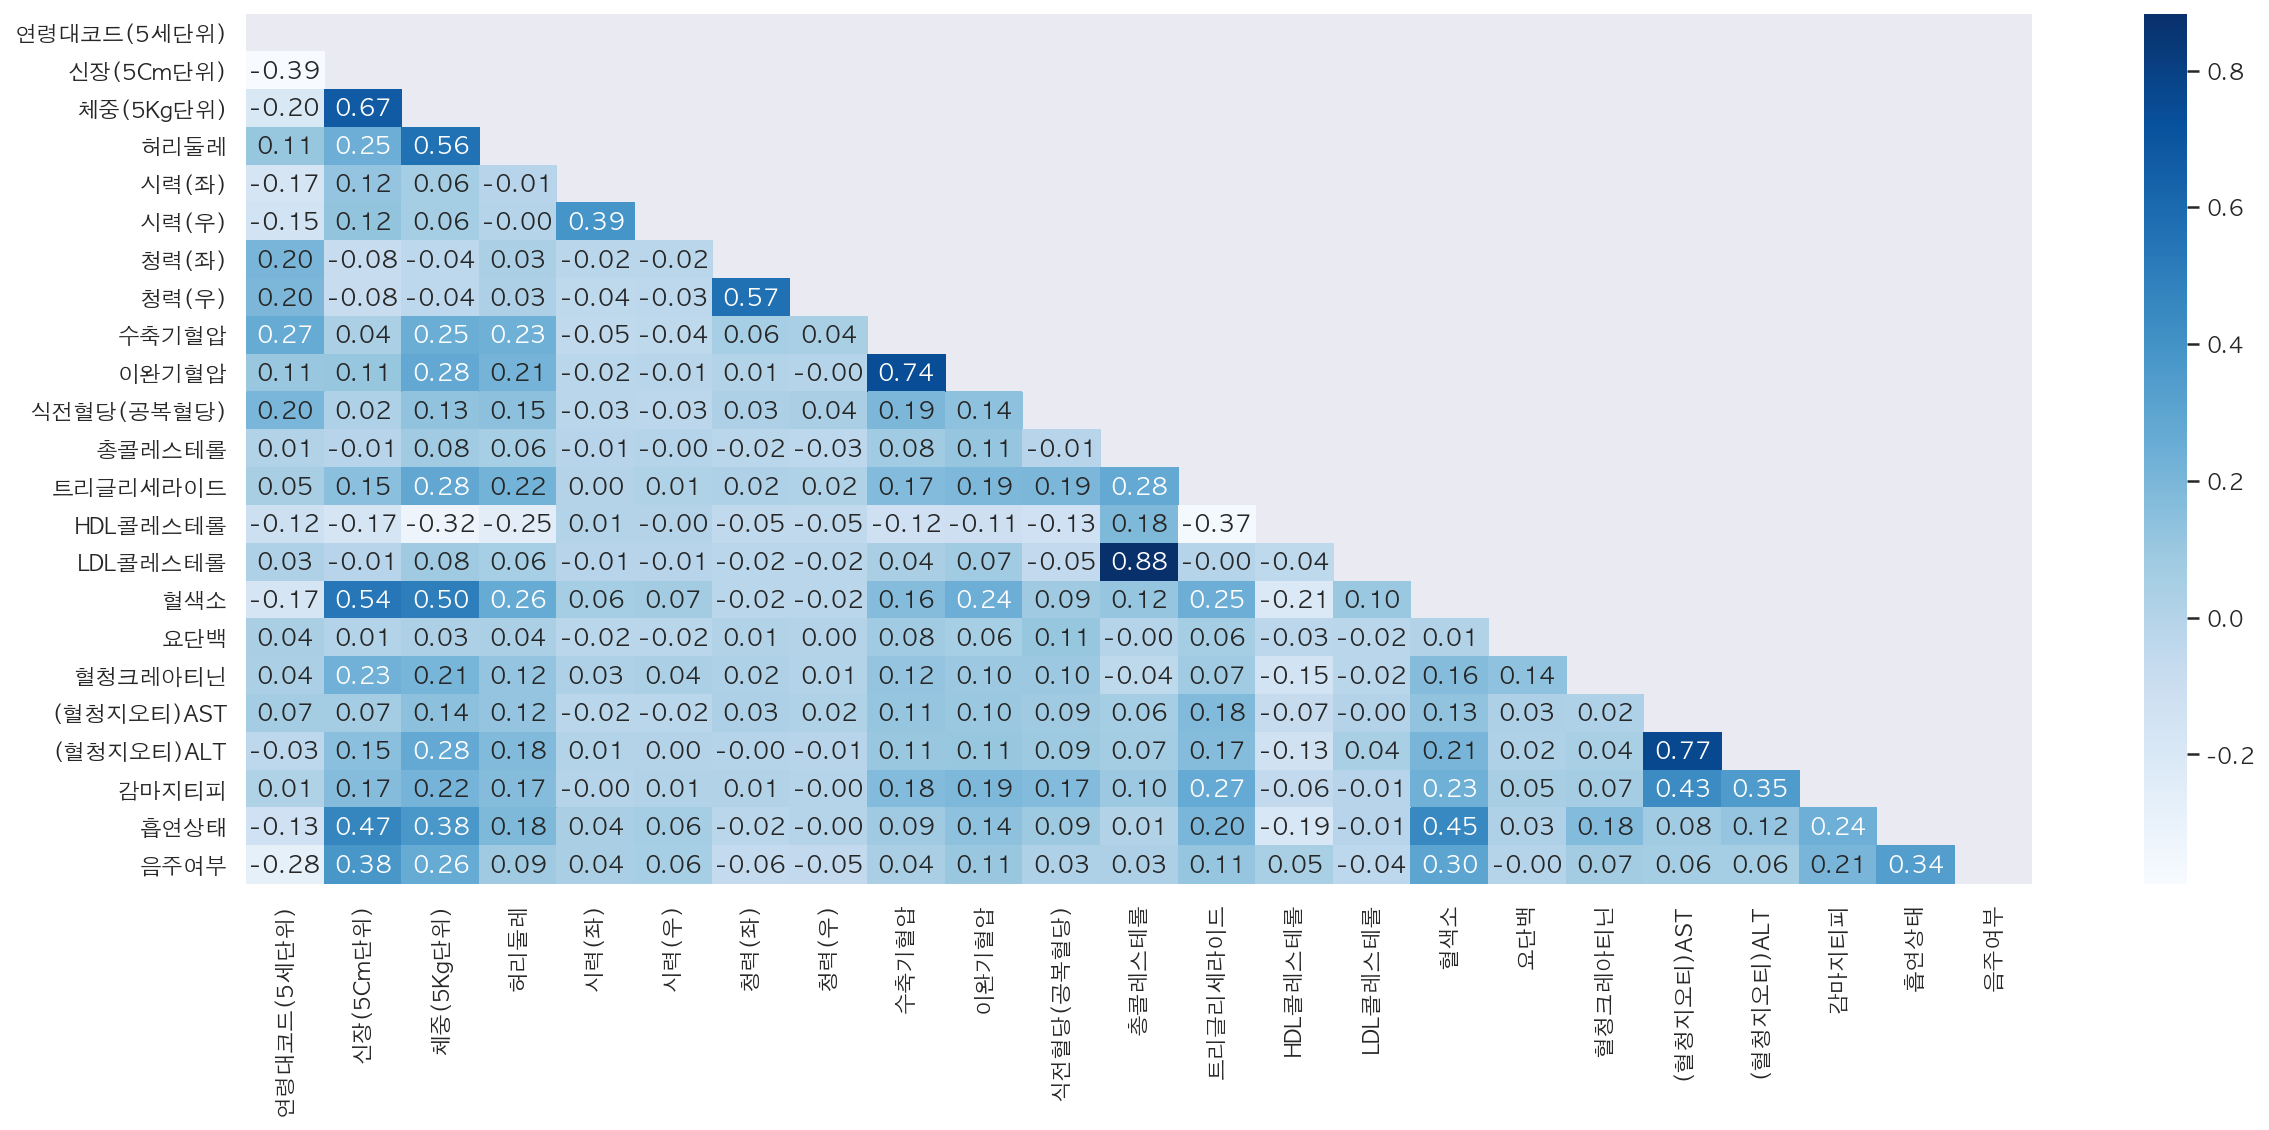

In [199]:
plt.figure(figsize=(20,8))
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='Blues', mask=mask)

# 가설 검증

- 1.음주 여부에 따라 건강검진 수치 차이가 있을까? YES
- 2.신장과 허리둘레의 크기는 체중과 상관관계가 있을까? YES 

In [204]:
df.isnull().mean()

기준년도            0.000000
가입자일련번호         0.000000
성별코드            0.000000
연령대코드(5세단위)     0.000000
시도코드            0.000000
신장(5Cm단위)       0.000000
체중(5Kg단위)       0.000000
허리둘레            0.000266
시력(좌)           0.000183
시력(우)           0.000189
청력(좌)           0.000158
청력(우)           0.000156
수축기혈압           0.000019
이완기혈압           0.000018
식전혈당(공복혈당)      0.000042
총콜레스테롤          0.000043
트리글리세라이드        0.000045
HDL콜레스테롤        0.000044
LDL콜레스테롤        0.002912
혈색소             0.000052
요단백             0.004592
혈청크레아티닌         0.000043
(혈청지오티)AST      0.000041
(혈청지오티)ALT      0.000042
감마지티피           0.000042
흡연상태            0.000144
음주여부            0.000536
구강검진수검여부        0.000000
치아우식증유무         1.000000
결손치유무           1.000000
치아마모증유무         1.000000
제3대구치(사랑니)이상    1.000000
치석              0.599477
데이터공개일자         0.000000
dtype: float64